# 0. Initialize

#*CS412* *PROJECT* *ROUND 1*

       - Kayra Bilgin 25117 -
       - EFE ÖZTABAN 25202 -


EFE/KAYRA PRODUCTIONS GURURLA SUNAR. İYİ SEYİRLER.

## 0.1. Import Libraries

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import os, sys, glob
import gzip
import random
import tqdm
import json
import string 
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)

from IPython import display
import matplotlib as mpl
from matplotlib import pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cd /content/drive/MyDrive/CS412 HWs/project

/content/drive/MyDrive/CS412 HWs/project


## 0.2. DEFINE VARIABLES 

In [272]:
DATA_PATH = '/content/drive/MyDrive/CS412 HWs/project/'

ROUND = 1 # This project will have 3 rounds of predictions: 1,2,3
STUDENT_ID = '25202'
PROJECT_CODE = 'CS4120db4fc7b2d34' # Same code for the annotation eg. CS412xxxxx

## 0.3. Read Training & Evaluation Data

### 0.3.1. Get the labels for tweets

In [47]:
#trainingTweetDf = pd.read_csv('{}training-tweet.csv'.format(DATA_PATH))
trainingTweetDf = pd.read_csv('training-tweet.csv', dtype={'tweet_id': str, 'isPolitical': str})
trainingTweetDf

,tweet_id,isPolitical
0,1418828259614236672,No
1,1424439289753083911,No
2,1354305766644199427,Yes
3,1438890637282193408,Yes
4,1397543048452591616,No
...,...,...
2995,1416144676990722053,Yes
2996,1466793383788220421,Yes
2997,1448350353439744003,Yes
2998,1423327989044072453,Yes


In [48]:
trainingTweetDf.isPolitical.value_counts()

No     1509
Yes    1491
Name: isPolitical, dtype: int64

### 0.3.2. Get the labels for users

In [49]:
#trainingUserDf = pd.read_csv('{}training-user.csv'.format(DATA_PATH))
trainingUserDf = pd.read_csv('training-user.csv')
trainingUserDf

,screen_name,isBot
0,faracyaziyor,No
1,elifgibirt,No
2,buocguldurdu,No
3,__baba1yaga_,No
4,hakanyilmazcebi,No
...,...,...
2995,kupakralicesi53,No
2996,muhamme44063672,No
2997,galaopta,Not sure
2998,hygea0,No


In [50]:
trainingUserDf.isBot.value_counts()

No          2363
Yes          401
Not sure     236
Name: isBot, dtype: int64

### 0.3.3. Expand your dataset with metadata and tweets

In [51]:
# You can also expand training data by downloading your own labeled datasets following the link
# Download the documents under "Link to training data"

print('http://www.onurvarol.com/AnnotationTwitterTR/reports/report_{}.html'.format(PROJECT_CODE))

http://www.onurvarol.com/AnnotationTwitterTR/reports/report_CS4120db4fc7b2d34.html


#### 0.3.3.1. Data Annotiated by the group members


In [52]:
efe_trainingTweetDf = pd.read_csv('annotated_tweets_CS4120db4fc7b2d34.csv')
efe_trainingTweetDf.rename(columns={"Unnamed: 0":"tweet_id"}, inplace= True)
efe_trainingTweetDf

,tweet_id,url,sentiment,isExperiential,isPolitical,isInsult
0,1387834827710373890,https://docs.google.com/forms/d/e/1FAIpQLSctrQ...,Negative,No,Yes,Yes
1,1420467690997796871,https://docs.google.com/forms/d/e/1FAIpQLSctrQ...,Negative,No,Yes,Yes
2,1440608696795492358,https://docs.google.com/forms/d/e/1FAIpQLSctrQ...,Negative,No,Yes,No
3,1454715114704277506,https://docs.google.com/forms/d/e/1FAIpQLSctrQ...,Positive,Yes,No,No
4,1440421718158286849,https://docs.google.com/forms/d/e/1FAIpQLSctrQ...,Neutral,No,No,No
...,...,...,...,...,...,...
245,1426598042539544581,https://docs.google.com/forms/d/e/1FAIpQLSctrQ...,Positive,Yes,No,No
246,1444081591110799360,https://docs.google.com/forms/d/e/1FAIpQLSctrQ...,Negative,No,Yes,Yes
247,1458474505689567238,https://docs.google.com/forms/d/e/1FAIpQLSctrQ...,Neutral,Yes,Yes,No
248,1350117652174397442,https://docs.google.com/forms/d/e/1FAIpQLSctrQ...,Neutral,Yes,No,No


In [53]:
kayra_trainingTweetDf = pd.read_csv('annotated_tweets_CS4128dca92f1c122.csv')
kayra_trainingTweetDf.rename(columns={"Unnamed: 0":"tweet_id"}, inplace= True)
kayra_trainingTweetDf

,tweet_id,url,sentiment,isExperiential,isPolitical,isInsult
0,1416509473464664068,https://docs.google.com/forms/d/e/1FAIpQLSctrQ...,Positive,Yes,No,No
1,1356238030449729538,https://docs.google.com/forms/d/e/1FAIpQLSctrQ...,Neutral,No,No,No
2,1457712741704208388,https://docs.google.com/forms/d/e/1FAIpQLSctrQ...,Neutral,Yes,Yes,No
3,1374973651741765632,https://docs.google.com/forms/d/e/1FAIpQLSctrQ...,Negative,No,No,Yes
4,1355218051214553090,https://docs.google.com/forms/d/e/1FAIpQLSctrQ...,Positive,Yes,No,No
...,...,...,...,...,...,...
245,1472055651077660673,https://docs.google.com/forms/d/e/1FAIpQLSctrQ...,Negative,No,Yes,Yes
246,1459486165002858499,https://docs.google.com/forms/d/e/1FAIpQLSctrQ...,Negative,No,Yes,No
247,1382055945849729026,https://docs.google.com/forms/d/e/1FAIpQLSctrQ...,Neutral,No,No,No
248,1422657985470414854,https://docs.google.com/forms/d/e/1FAIpQLSctrQ...,Neutral,No,No,No


In [54]:
our_trainingTweetDf = pd.concat([efe_trainingTweetDf, kayra_trainingTweetDf], axis=0)
our_trainingTweetDf.drop_duplicates(subset=["tweet_id"], keep='first', inplace=True)
our_trainingTweetDf.reset_index(inplace=True)
our_trainingTweetDf

,index,tweet_id,url,sentiment,isExperiential,isPolitical,isInsult
0,0,1387834827710373890,https://docs.google.com/forms/d/e/1FAIpQLSctrQ...,Negative,No,Yes,Yes
1,1,1420467690997796871,https://docs.google.com/forms/d/e/1FAIpQLSctrQ...,Negative,No,Yes,Yes
2,2,1440608696795492358,https://docs.google.com/forms/d/e/1FAIpQLSctrQ...,Negative,No,Yes,No
3,3,1454715114704277506,https://docs.google.com/forms/d/e/1FAIpQLSctrQ...,Positive,Yes,No,No
4,4,1440421718158286849,https://docs.google.com/forms/d/e/1FAIpQLSctrQ...,Neutral,No,No,No
...,...,...,...,...,...,...,...
445,244,1434617299697377282,https://docs.google.com/forms/d/e/1FAIpQLSctrQ...,Neutral,No,No,No
446,245,1472055651077660673,https://docs.google.com/forms/d/e/1FAIpQLSctrQ...,Negative,No,Yes,Yes
447,246,1459486165002858499,https://docs.google.com/forms/d/e/1FAIpQLSctrQ...,Negative,No,Yes,No
448,248,1422657985470414854,https://docs.google.com/forms/d/e/1FAIpQLSctrQ...,Neutral,No,No,No


In [55]:
trainingTweetDf = pd.concat([trainingTweetDf, our_trainingTweetDf], axis=0)
trainingTweetDf.drop_duplicates(subset=["tweet_id"], keep='first', inplace=True)
trainingTweetDf.reset_index(inplace=True)
trainingTweetDf

,level_0,tweet_id,isPolitical,index,url,sentiment,isExperiential,isInsult
0,0,1418828259614236672,No,NaN,NaN,NaN,NaN,NaN
1,1,1424439289753083911,No,NaN,NaN,NaN,NaN,NaN
2,2,1354305766644199427,Yes,NaN,NaN,NaN,NaN,NaN
3,3,1438890637282193408,Yes,NaN,NaN,NaN,NaN,NaN
4,4,1397543048452591616,No,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
3445,445,1434617299697377282,No,244.0,https://docs.google.com/forms/d/e/1FAIpQLSctrQ...,Neutral,No,No
3446,446,1472055651077660673,Yes,245.0,https://docs.google.com/forms/d/e/1FAIpQLSctrQ...,Negative,No,Yes
3447,447,1459486165002858499,Yes,246.0,https://docs.google.com/forms/d/e/1FAIpQLSctrQ...,Negative,No,No
3448,448,1422657985470414854,No,248.0,https://docs.google.com/forms/d/e/1FAIpQLSctrQ...,Neutral,No,No


In [56]:
efe_trainingUserDf = pd.read_csv('annotated_users_CS4120db4fc7b2d34.csv')
efe_trainingUserDf.rename(columns={"Unnamed: 0":"screen_name"}, inplace= True)
efe_trainingUserDf

,screen_name,url,isOrganizational,isBot,isTroll
0,ercanpaksoy2,https://docs.google.com/forms/d/e/1FAIpQLScfbD...,No,No,No
1,mahmudoglumurad,https://docs.google.com/forms/d/e/1FAIpQLScfbD...,No,Yes,No
2,paaolu18,https://docs.google.com/forms/d/e/1FAIpQLScfbD...,No,No,No
3,onungibiler,https://docs.google.com/forms/d/e/1FAIpQLScfbD...,No,Not sure,Not sure
4,arthrmrgn_,https://docs.google.com/forms/d/e/1FAIpQLScfbD...,No,No,No
...,...,...,...,...,...
245,taylankumelii,https://docs.google.com/forms/d/e/1FAIpQLScfbD...,No,No,No
246,sebogs0,https://docs.google.com/forms/d/e/1FAIpQLScfbD...,No,Not sure,Not sure
247,thabomalope_,https://docs.google.com/forms/d/e/1FAIpQLScfbD...,No,No,No
248,bkbuasansorturk,https://docs.google.com/forms/d/e/1FAIpQLScfbD...,No,No,No


In [57]:
kayra_trainingUserDf = pd.read_csv('annotated_users_CS4128dca92f1c122.csv')
kayra_trainingUserDf.rename(columns={"Unnamed: 0":"screen_name"}, inplace= True)
kayra_trainingUserDf

,screen_name,url,isOrganizational,isBot,isTroll
0,mississippi_yy,https://docs.google.com/forms/d/e/1FAIpQLScfbD...,No,No,No
1,selim55003133,https://docs.google.com/forms/d/e/1FAIpQLScfbD...,No,No,No
2,joleabsj,https://docs.google.com/forms/d/e/1FAIpQLScfbD...,No,No,No
3,dilarabbing,https://docs.google.com/forms/d/e/1FAIpQLScfbD...,No,No,No
4,coldkitchen,https://docs.google.com/forms/d/e/1FAIpQLScfbD...,No,No,No
...,...,...,...,...,...
245,aleynakdal1,https://docs.google.com/forms/d/e/1FAIpQLScfbD...,No,No,No
246,fatma_aytac,https://docs.google.com/forms/d/e/1FAIpQLScfbD...,No,No,No
247,seref_madenli,https://docs.google.com/forms/d/e/1FAIpQLScfbD...,No,No,No
248,iyigenclikksk,https://docs.google.com/forms/d/e/1FAIpQLScfbD...,Yes,No,No


In [58]:
our_trainingUserDf = pd.concat([efe_trainingUserDf, kayra_trainingUserDf], axis=0)
our_trainingUserDf.drop_duplicates(subset=["screen_name"], keep='first', inplace=True)
our_trainingUserDf.reset_index(inplace=True)
our_trainingUserDf

,index,screen_name,url,isOrganizational,isBot,isTroll
0,0,ercanpaksoy2,https://docs.google.com/forms/d/e/1FAIpQLScfbD...,No,No,No
1,1,mahmudoglumurad,https://docs.google.com/forms/d/e/1FAIpQLScfbD...,No,Yes,No
2,2,paaolu18,https://docs.google.com/forms/d/e/1FAIpQLScfbD...,No,No,No
3,3,onungibiler,https://docs.google.com/forms/d/e/1FAIpQLScfbD...,No,Not sure,Not sure
4,4,arthrmrgn_,https://docs.google.com/forms/d/e/1FAIpQLScfbD...,No,No,No
...,...,...,...,...,...,...
445,245,aleynakdal1,https://docs.google.com/forms/d/e/1FAIpQLScfbD...,No,No,No
446,246,fatma_aytac,https://docs.google.com/forms/d/e/1FAIpQLScfbD...,No,No,No
447,247,seref_madenli,https://docs.google.com/forms/d/e/1FAIpQLScfbD...,No,No,No
448,248,iyigenclikksk,https://docs.google.com/forms/d/e/1FAIpQLScfbD...,Yes,No,No


In [59]:
trainingUserDf = pd.concat([trainingUserDf, our_trainingUserDf], axis=0)
trainingUserDf.drop_duplicates(subset=["screen_name"], keep='first', inplace=True)
trainingUserDf.reset_index(inplace=True)
trainingUserDf

,level_0,screen_name,isBot,index,url,isOrganizational,isTroll
0,0,faracyaziyor,No,NaN,NaN,NaN,NaN
1,1,elifgibirt,No,NaN,NaN,NaN,NaN
2,2,buocguldurdu,No,NaN,NaN,NaN,NaN
3,3,__baba1yaga_,No,NaN,NaN,NaN,NaN
4,4,hakanyilmazcebi,No,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
3387,444,turkcesondakika,No,244.0,https://docs.google.com/forms/d/e/1FAIpQLScfbD...,No,No
3388,445,aleynakdal1,No,245.0,https://docs.google.com/forms/d/e/1FAIpQLScfbD...,No,No
3389,446,fatma_aytac,No,246.0,https://docs.google.com/forms/d/e/1FAIpQLScfbD...,No,No
3390,447,seref_madenli,No,247.0,https://docs.google.com/forms/d/e/1FAIpQLScfbD...,No,No


## 1. Landing Page

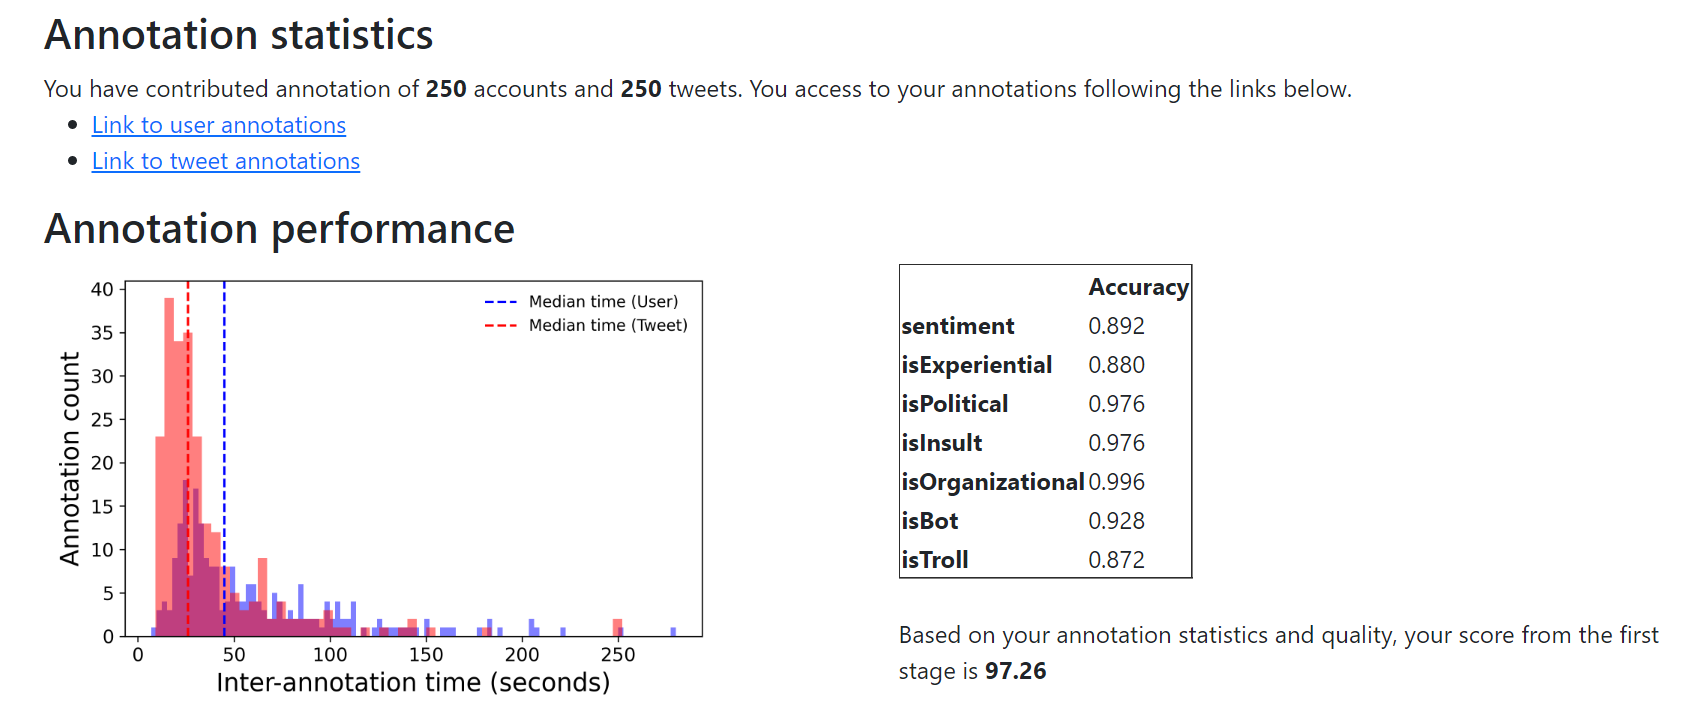

In [ ]:
display.Image("https://i.imgur.com/IHvQHIf.png")

## 2. Link for Downloading Training Data

At the bottom of the page, you will see the **LINK FOR FILES**

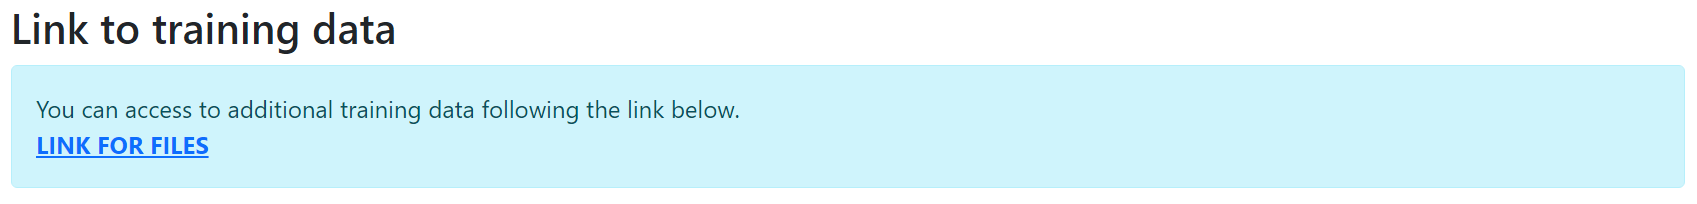

In [ ]:
display.Image("https://i.imgur.com/t19vAjr.png")

## 3. Google Drive

You can download the following project files from Google Drive

- **user_profiles.jsons.gz**: Contains user metadata for bot detection phase of your project
- **user_tweets.jsons.gz**: Contains at most 200 tweets of the above mentioned users'
- **tweet_metadata.jsons.gz**: Contains tweets and their metadata for the political tweet detection of your project

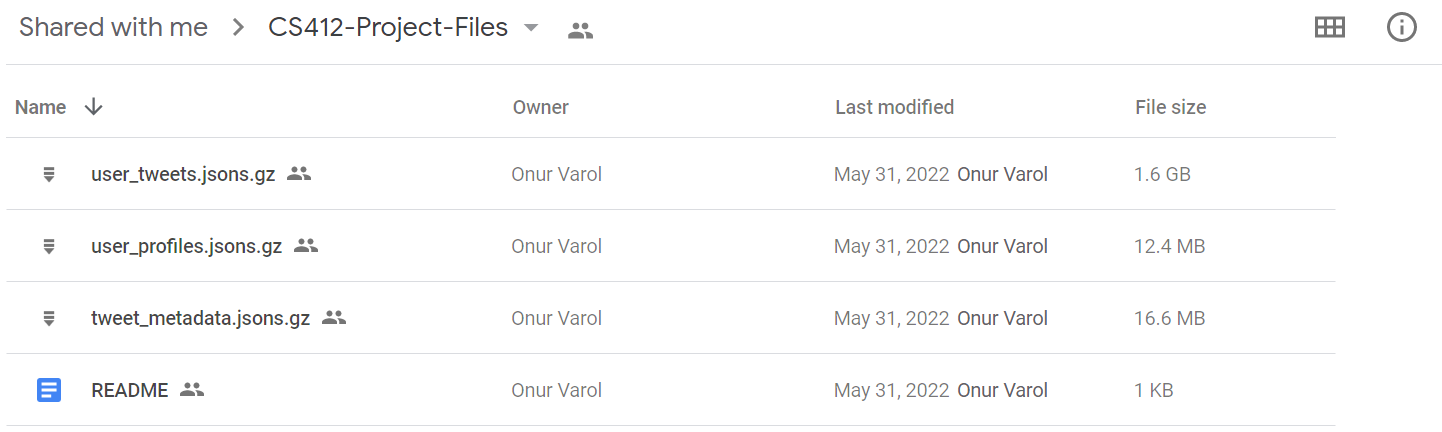

In [ ]:
display.Image("https://i.imgur.com/7FjWPLi.png")

# 1. EXTRACT FEATURES
Under *1.1. Political Tweet Detection* and *1.2. Bot Detection*, we firstly collect raw data for processing. We then combine some of them (total_interactions = num_favorites + num_retweets) or use them to extract features (whether the tweet has one of the political entities @meralaksener, @kilicdarogluk etc.).

We expect you to collect more raw data from **tweet_metadata**, **user_profiles** and **user_tweets** files by creating a function as shown in below examples such as *check_if_retweet()* and using it while iterating over data as shown under *Merge Collected Features*.

We also expect you to create new variables as much as you can from the data in order to make your predictions more accurate. For example, you may want to check:

- The tweet sources that a user frequently uses
- Whether the user is a verified account or not

...

to assess whether **a user is a bot or not** and whether **a tweet is political or not**.

In [6]:
PATH_TO_DOWNLOADED = '/content/drive/MyDrive/CS412 HWs/project/'

## 1.1. Political Tweet Detection
This part stands for the feature extraction of tweets. We start with collecting the raw data from *tweet_metadata*, then use some of them to extract features.

### 1.1.1. Get Raw Data

#### 1.1.1.1. Check if Retweet

In [164]:
def check_if_retweet(tweet_metadata_line):
    is_retweet = 0
    retweeted_username = None

    try:
        tweet_metadata_line['retweeted_status']
        retweeted_username = tweet_metadata_line['retweeted_status']['user']['screen_name'].lower()
        is_retweet = 1

    except KeyError:
        pass

    return is_retweet, retweeted_username

#### 1.1.1.2. Get Tweet Text

In [165]:
def get_tweet_text(tweet_metadata_line):
    text = tweet_metadata_line['text']
    
    return text

#### 1.1.1.3. Get Tweet ID

In [166]:
def get_tweet_id(tweet_metadata_line):
    id_str = tweet_metadata_line['id_str']
    
    return id_str

#### 1.1.1.4. Get Number of Mentions and Hashtags

In [167]:
def get_number_mentions_hashtags(tweet_metadata_line):
    num_mentions = len(tweet_metadata_line['entities']['user_mentions'])
    num_hashtags = len(tweet_metadata_line['entities']['hashtags'])

    return num_mentions, num_hashtags

#### 1.1.1.5. Get Number of Retweets and Favorites

In [168]:
def get_number_retweets_favorites(tweet_metadata_line):
    retweet_count = tweet_metadata_line['retweet_count']
    favorite_count = tweet_metadata_line['favorite_count']
    
    return retweet_count, favorite_count

#### 1.1.1.6. Get User Info

In [169]:
def get_user_info(tweet_metadata_line):
    id = tweet_metadata_line['user']['id_str']
    screen_name = tweet_metadata_line['user']['screen_name'].lower()
    description = tweet_metadata_line['user']['description']

    return id, screen_name, description

#### 1.1.1.6. Get User Counts

In [170]:
def get_user_counts(tweet_metadata_line):

    follower_count = tweet_metadata_line['user']['followers_count']
    friend_count = tweet_metadata_line['user']['friends_count']
    if follower_count == 0 and friend_count == 0:
      ratio = 0
    else:
      ratio = friend_count/(friend_count+follower_count)

    return follower_count, friend_count, ratio

### 1.1.2. Derive Manually Crafted Features

#### 1.1.2.1. Check for political entity in text

In [171]:
def check_political_ent(text):
    
    # the list below can be modified and some new names may be added (or removed)
    list_of_entities = ['meral_aksener', 'kilicdarogluk', 'vekilince', 'RTErdogan', 'MevlutCavusoglu', 'umitozdag']

    akp = ['ziyaselcuk', 'fuatoktay' ,"BY","omerrcelik", "akaraismailoglu", "murat_kurum", "iletisim","erdogan","recep","tayyip","reis", "berat","albayrak","abdulhamitgul", "soylu","suleymansoylu",
           "06melihgokcek","gokcek", "lutfielvan", "nebati"]
    chp = ['ekrem_imamoglu',"ekrem","imamoglu","imamoğlu","mansur","kemal","kılıcdaroglu","kılıçdaroglu","kılıçdar","kılıcdar","kilicdar","canan","kaftancıoglu","Canan_Kaftanci","erenerdemnet",
           "eczozgurozel", "tuncsoyer", "tunc","soyer","BocekMuhittin", "muharrem","tanjuozcanchp", "baykal", "selinsayekboke"]
    iyip = ["meral","aksener","akşener"]
    mhp = ["devlet","bahceli","bahçeli"]
    tip = ["tipgenelmerkez","tip","erkbas","sahmetsahmet","serakadigil","barisatay","şık","ahmet şık","erkan baş","serra kadıgil","kadıgil","kadigil" ]
    hdp = ["selahattin","demirtaş","demirtas","hdpdemirtas","pervin","buldan","PervinBuldan","FilizKer","GaroPaylan","HudaKaya777"]
    parti_hesapları = ["akp","chp","mhp","vatan","zafer","deva","gelecek","refah","iyiparti"]
    other = ["alibabacan", "babacan", "Ahmet_Davutoglu", "davutoglu", "T_Karamollaoglu", "karamollaoglu", "ekmeleddin", "perincek" ]
    bakanlıklar = ["drfahrettinkoca", "fahrettin", "koca","bekirpakdemirli",]
    belediye_hesapları = []
    gazeteciler = []
    haber_siteleri = []
    politik_konular = ["ekonomi", "zam", "dolar", "ekmek", "euro", "benzin", "alkol", "sigara", "elektrik","dogalgaz","doğalgaz","mülteci","multeci","afgan","pakistan",
                       "suriye", "askerlik", "savaş","savas","asker","meclis","cumhurbaskanı", "cumhurbaşkanı","başkan","baskan","bakan","muhalefet","seçim","oy","secim",
                       "miting", "parti", "kürt","terörist","terorist","terör","teror","feto","fetö", "fetöcü","fetocu","sayın", "sedat_peker" ,"peker" ,"atama","siyasi","koalisyon",
                       "öcalan","imrali","imralı","ocalan","kandil","apo","roboski","soykırım","ermeni", "damat", "komunist", "komünist", "islamcı", "ırkcı","ırkçı", "solcu", "sağcı", "sagcı",
                       "faşist", "fasist", "cumhurbaşkanımız", "gezi", "darbe","kalkısma", "rabia","referandum" ]
        
    list_of_entities = list_of_entities + akp + chp + iyip + mhp + tip + hdp + parti_hesapları + bakanlıklar + belediye_hesapları + politik_konular + gazeteciler + haber_siteleri + other

    
    entities_in_text = [ent for ent in list_of_entities if ent.lower() in text.lower()]
    number_entities = len(entities_in_text)

    return number_entities

Check for political entity in retweeded account

In [172]:
def check_rt_account(text,is_retweet):

    if is_retweet == 0:
      return 0
    
    # the list below can be modified and some new names may be added (or removed)
    list_of_entities = ['meral_aksener', 'kilicdarogluk', 'vekilince', 'RTErdogan', 'MevlutCavusoglu', 'umitozdag']

    akp = ['ziyaselcuk', 'fuatoktay' ,"BY","omerrcelik", "akaraismailoglu", "murat_kurum", "iletisim","erdogan","recep","tayyip","reis", "berat","albayrak","abdulhamitgul", "soylu","suleymansoylu",
           "06melihgokcek","gokcek", "lutfielvan", "nebati"]
    chp = ['ekrem_imamoglu',"ekrem","imamoglu","imamoğlu","mansur","kemal","kılıcdaroglu","kılıçdaroglu","kılıçdar","kılıcdar","kilicdar","canan","kaftancıoglu","Canan_Kaftanci","erenerdemnet",
           "eczozgurozel", "tuncsoyer", "tunc","soyer","BocekMuhittin", "muharrem","tanjuozcanchp", "baykal", "selinsayekboke"]
    iyip = ["meral","aksener","akşener"]
    mhp = ["devlet","bahceli","bahçeli"]
    tip = ["tipgenelmerkez","tip","erkbas","sahmetsahmet","serakadigil","barisatay" ]
    hdp = ["selahattin","demirtaş","demirtas","hdpdemirtas","pervin","buldan","PervinBuldan","FilizKer","GaroPaylan","HudaKaya777"]
    parti_hesapları = ["akp","chp","mhp","vatan","zafer","deva","gelecek","refah","iyiparti"]
    other = ["alibabacan", "babacan", "Ahmet_Davutoglu", "davutoglu", "T_Karamollaoglu", "karamollaoglu", "ekmeleddin", "perincek" ]
    bakanlıklar = ["drfahrettinkoca", "fahrettin", "koca","bekirpakdemirli",]
    belediye_hesapları = []
    gazeteciler = []
    haber_siteleri = []
    politik_konular = ["ekonomi", "zam", "dolar", "ekmek", "euro", "benzin", "alkol", "sigara", "elektrik","dogalgaz","doğalgaz","mülteci","multeci","afgan","pakistan",
                       "suriye", "askerlik", "savaş","savas","asker","meclis","cumhurbaskanı", "cumhurbaşkanı","başkan","baskan","bakan","muhalefet","seçim","oy","secim",
                       "miting", "parti", "kürt","terörist","terorist","terör","teror","feto","fetö", "fetöcü","fetocu","sayın", "sedat_peker" ,"peker" ,"atama","siyasi","koalisyon",
                       "öcalan","imrali","imralı","ocalan","kandil","apo","roboski","soykırım","ermeni", "damat", "komunist", "komünist", "islamcı", "ırkcı","ırkçı", "solcu", "sağcı", "sagcı",
                       "faşist", "fasist", "cumhurbaşkanımız", "gezi", "darbe","kalkısma", "rabia","referandum" ]
        
    list_of_entities = list_of_entities + akp + chp + iyip + mhp + tip + hdp + parti_hesapları + bakanlıklar + belediye_hesapları + politik_konular + gazeteciler + haber_siteleri + other

    
    entities_in_text = [ent for ent in list_of_entities if ent.lower() in text.lower()]
    number_entities = len(entities_in_text)

    if number_entities == 0:
      return 0
    else:
      return 1

#### 1.1.2.2. Number of total interactions

In [173]:
def total_interactions(retweet_count, favorite_count):
    total_num_interactions = retweet_count + favorite_count
    
    return total_num_interactions

### 1.1.2. Collect data using the functions above and transform into a Pandas DataFrame

In [174]:
dfPolitical = {'tweet_id':[],
              'is_retweet':[],
              'retweeted_username':[],
              'text':[],
              'num_mentions':[],
              'num_hashtags':[],
              'num_retweets':[],
              'retweeted_account_check':[],
              'num_favorites':[],
              'user_id':[],
              'user_screen_name':[],
              'user_description':[],
              'num_political_entities_text':[],
              'num_political_entities_desc':[],
              'total_interactions':[],
               "follower_count":[],
               "friend_count":[],
               "ratio":[],
               "tweet_length":[]}


with gzip.open(f"{PATH_TO_DOWNLOADED}tweet_metadata.jsons.gz", "rb") as f:
    for line in f:
        line = json.loads(line)

        
        # raw data:
        id_str = get_tweet_id(line)
        is_retweet, retweeted_username = check_if_retweet(line)
        text = get_tweet_text(line)
        num_mentions, num_hashtags = get_number_mentions_hashtags(line)
        retweet_count, favorite_count = get_number_retweets_favorites(line)
        user_id_str, screen_name, user_description = get_user_info(line)
        follower_count, friend_count, ratio = get_user_counts(line)

        # manually crafted data:
        num_political_entities_text = check_political_ent(text)
        num_political_entities_desc = check_political_ent(user_description)
        total_num_interactions = total_interactions(retweet_count, favorite_count)
        rt_political_check = check_rt_account(retweeted_username,is_retweet)

        dfPolitical['tweet_id'].append(id_str)
        dfPolitical['is_retweet'].append(is_retweet)
        dfPolitical['retweeted_username'].append(retweeted_username)
        dfPolitical['text'].append(text)
        dfPolitical['num_mentions'].append(num_mentions)
        dfPolitical['num_hashtags'].append(num_hashtags)
        dfPolitical['num_retweets'].append(retweet_count)
        dfPolitical['num_favorites'].append(favorite_count)
        dfPolitical['user_id'].append(user_id_str)
        dfPolitical['user_screen_name'].append(screen_name)
        dfPolitical['user_description'].append(user_description)
        dfPolitical['num_political_entities_text'].append(num_political_entities_text)
        dfPolitical['num_political_entities_desc'].append(num_political_entities_desc)
        dfPolitical['retweeted_account_check'].append(rt_political_check)
        dfPolitical['total_interactions'].append(total_num_interactions)
        dfPolitical['follower_count'].append(follower_count)
        dfPolitical['friend_count'].append(friend_count)
        dfPolitical['ratio'].append(ratio)
        dfPolitical['tweet_length'].append(len(text))

In [175]:
dfPolitical = pd.DataFrame(dfPolitical)
dfPolitical

,tweet_id,is_retweet,retweeted_username,text,num_mentions,num_hashtags,num_retweets,retweeted_account_check,num_favorites,user_id,user_screen_name,user_description,num_political_entities_text,num_political_entities_desc,total_interactions,follower_count,friend_count,ratio,tweet_length
0,1416676063216799754,0,None,@Murat_ide @meral_aksener Bu bu büyük millet k...,2,0,0,0,0,1368124787009216516,murtaza91000878,,3,0,0,4,37,0.902439,102
1,1445677417150889986,1,ekrem_imamoglu,RT @ekrem_imamoglu: Geldikleri gibi gittiler… ...,1,0,6706,1,0,1263130166961864705,hasanak11633015,64 Jahre alt,3,0,6706,38,988,0.962963,69
2,1456638729620230149,1,yenisafak,RT @yenisafak: İYİ PARTİLİ TÜRKKAN ŞEHİT AĞABE...,1,0,1545,0,0,2958652582,buyukdogu58,Katılıyorum: RT+FAV,4,0,1545,618,684,0.525346,139
3,1451295314074341381,1,ekrem_imamoglu,RT @ekrem_imamoglu: Bu gece ben: ❤️💛\nTebrikle...,1,0,7470,1,0,1447285927471112194,gskaya444,,3,0,7470,2,23,0.920000,58
4,1440610747134844929,1,umitozdag,RT @umitozdag: Sayın Bakan demek yüzmeyi öğren...,1,0,745,1,0,379944275,cerenncan,,3,0,745,153,470,0.754414,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32997,1439639972177489926,1,deryayanikashb,RT @deryayanikashb: AK Parti Çanakkale İl Başk...,1,0,48,0,0,165689533,sezayicimen,İst.Aydın Üniversitesi Mahalli İdareler ve Yer...,2,1,48,3378,3074,0.476441,140
32998,1467519965473423362,1,kilicdarogluk,RT @kilicdarogluk: Türkiye Barolar Birliği 36....,1,0,4438,1,0,408719429,sdiplen1,Hepimiz birileri için kurallarımızı çiğnedik,4,0,4438,30,656,0.956268,140
32999,1423666826282668035,1,rterdogan,RT @RTErdogan: Geleceğe Nefes kampanyasıyla he...,1,0,14311,1,0,1004379711890485248,soguzsoylu,AK Parti Yumurtalık İlçe Başkanı,3,2,14311,2036,1037,0.337455,140
33000,1417025303894007810,1,thetubaca,RT @thetubaca: Hasta tutuklu Ekim Polat açlık ...,3,0,16,0,0,1049663929348222985,mhmt_ckmk04,667 ile yılları çalınan gurebadan bir garip...,2,0,16,1259,2027,0.616859,102


In [176]:
dfPolitical = dfPolitical[["text","tweet_id","is_retweet","num_mentions","num_hashtags","num_retweets","retweeted_account_check","num_favorites","num_political_entities_text","num_political_entities_desc","total_interactions","tweet_length"]]

## 1.2. From Users

### 1.2.1. Get user metadata from user_profiles.jsons.gz

#### 1.2.1.1. Get user info metadata and monthly tweet count of users

In [20]:
def get_user_info_metadata(user_metadata_line):


    months = {"Jan":1,"Feb":2,"Mar":3,"Apr":4,"May":5,"Jun":6,"Jul":7,"Aug":8,"Sep":9,"Oct":10,"Nov":11,"Dec":12}


    
    user_id = user_metadata_line['id_str']
    user_name = user_metadata_line['name']
    user_screen_name = user_metadata_line['screen_name'].lower()
    user_location = user_metadata_line['location']
    user_description = user_metadata_line['description']
    user_followers_count = user_metadata_line['followers_count']
    user_friends_count = user_metadata_line['friends_count']
    
    beginning_date = user_metadata_line["created_at"]

    month = int(months[beginning_date.split(" ")[1]])
    year = int(beginning_date.split(" ")[5])
    month_duration = (2022-year)*12 + (6-month)

    total_tweets = user_metadata_line["statuses_count"]

    tweet_frequency = total_tweets/month_duration

    if user_metadata_line["favourites_count"] != 0:
      fav_ratio = user_metadata_line["favourites_count"]/month_duration
    else:
      fav_ratio = 0
    
    dictionary = {'user_id':user_id, 'user_name': user_name, 'user_screen_name':user_screen_name, 'user_location':user_location,
     'user_description':user_description, 'user_followers_count':user_followers_count, 'user_friends_count':user_friends_count, 
     "tweet_frequency":tweet_frequency, "fav_ratio":fav_ratio}

    return dictionary

#### 1.2.1.2. Get followers/(followers+friends) ratio

In [21]:
def get_followers_all_ratio(user_followers_count, user_friends_count):
    
    if user_friends_count + user_followers_count == 0:
        followers_all_ratio = 0

    else:
        followers_all_ratio =  user_followers_count / (user_friends_count + user_followers_count)

    return followers_all_ratio

#### 1.2.1.3. Get description length

In [22]:
def get_desc_len(user_description):
    
    description_len = len(user_description)

    return description_len

In [23]:
dfBot = {'user_id':[],
         'user_name':[],
         'user_screen_name':[],
         'user_location':[],
         'user_description':[],
         'user_followers_count':[],
         'user_friends_count':[],
         'description_len':[],
         'followers_to_all_ratio':[],
         "tweet_frequency":[],
         "fav_ratio":[]}


with gzip.open(f"{PATH_TO_DOWNLOADED}user_profiles.jsons.gz", "rb") as f:
    for line in f:
        line = json.loads(line)

        dictionary = get_user_info_metadata(line)
        for k,v in dictionary.items():
            dfBot[k].append(v)


        
        # manually crafted data:
        description_len = get_desc_len(dictionary['user_description'])
        dfBot['description_len'].append(description_len)
        
        followers_all_ratio = get_followers_all_ratio(dictionary['user_followers_count'], 
                                                      dictionary['user_friends_count'])

        dfBot['followers_to_all_ratio'].append(followers_all_ratio)

In [24]:
dfBot = pd.DataFrame(dfBot)
dfBot

,user_id,user_name,user_screen_name,user_location,user_description,user_followers_count,user_friends_count,description_len,followers_to_all_ratio,tweet_frequency,fav_ratio
0,1195008426784493571,Mesut Demir🎨,grslsntlarogrt,Mardin,Görsel Sanatlar Öğretmeni 🎨,2527,2609,27,0.492017,339.193548,288.000000
1,912738858437050369,AdnanToprak,adnantoprak46,Türkiye,,7527,6755,0,0.527027,29.578947,5757.666667
2,2490178497,"Nejla ÖNÇIRAK😷 bilgin yoksa , fikrin de olmasın👍",oykunejla,izmir,Önce insan...\nAnne❤\nHemşire❤\nHayvansever❤\n...,8819,8591,159,0.506548,281.571429,740.795918
3,161774611,Tek Kişilik Muhalefet,yalaaaaannnnn,,Hüloğcular lütfen uzan durun,284,1352,28,0.173594,192.482517,128.426573
4,1349294559797370881,Muti_79,muti_79,"Ankara, Türkiye",,3866,3937,0,0.495450,4227.882353,10164.882353
...,...,...,...,...,...,...,...,...,...,...,...
31816,467645507,T.C. İçişleri Bakanlığı,tc_icisleri,Türkiye,"T.C. İçişleri Bakanlığı Resmi Twitter Sayfası,...",2408670,29,119,0.999988,64.616000,1.296000
31817,1246020601996816385,tuncay,tuncayyilmz,"Gebze, Türkiye",her şeyimi buldum,8191,8183,17,0.500244,275.384615,968.653846
31818,601097854,GMG Kastamonuspor Kulübü,gmgkastamonusk,Kastamonu,GMG Kastamonuspor Kulübü Resmi Twitter Hesabı ...,9323,20,82,0.997859,87.475000,0.725000
31819,356064164,Show TV,showtv,"İstanbul, Türkiye",Show TV Resmi Twitter Profili https://t.co/d0g...,1355456,111,101,0.999918,741.215385,28.969231


### 1.2.2. Get Tweet Info of Users in user_profiles.jsons.gz

#### 1.2.2.1. Check ratio of retweets to all tweets and standard deviation of the tweet lengths

In [25]:
import statistics

In [26]:
def get_retweet_tweet_ratio(line):
    number_retweets = 0
    number_original_tweets = 0
    num_hashtags = 0
    tweet_vector = []
    tweet_length_vector = []

    for tweet in line['tweets']:
        try:
            tweet['retweeted_status']
            number_retweets += 1
                
        except:
            number_original_tweets += 1
            tweet_vector.append(tweet["text"])




    for i in tweet_vector:
      tweet_length_vector.append(len(i))
      if "#" in i:
        num_hashtags +=1
    
    if len(tweet_length_vector) == 0:
      tweet_length_mean = 0
      tweet_length_std = 0
    
    else:
      tweet_length_mean = sum(tweet_length_vector)/len(tweet_length_vector)
      tweet_length_std = statistics.pstdev(tweet_length_vector)
            
    total_tweets = number_retweets + number_original_tweets
    
    if total_tweets == 0:
        retweet_total_ratio = None
        hashtag_ratio = None
    else:
        retweet_total_ratio = number_retweets/(total_tweets)
        hashtag_ratio = num_hashtags/total_tweets
    
    
    
    return retweet_total_ratio, number_original_tweets, hashtag_ratio, tweet_length_mean, tweet_length_std

#### 1.2.2.2. Checking the similarity of tweets of one user with count vectorizer and cosine similarity

In [27]:
def get_cosine_similarity(count_matrix, num):
  cosine_sim = cosine_similarity(count_matrix[num],count_matrix)
  similar_tweets =  list(enumerate(cosine_sim[0]))
  sorted_similar_tweets = sorted(similar_tweets,key=lambda x:x[1],reverse=True)[1:]
  return sorted_similar_tweets[0][1]

In [28]:
def count_vectorizer(tweets):

  df = tweets.astype('U').values
  cv = CountVectorizer()
  count_matrix = cv.fit_transform(df.ravel())

  return count_matrix

In [29]:
def punctuation_check(tweet):   
    
    sentence = ""
    for x in tweet:
        word = ""
        for c in x:
            if c not in string.punctuation and c != "…":
                word += c
        if word != "":
            sentence += word
    return sentence

In [30]:
def get_tweet_similarity(line):

  tweet_vector = []

  for tweet in line['tweets']:
      try:
          tweet['retweeted_status']      
      except:
          y = tweet["text"].replace("\n", " ")
          x = punctuation_check(y)
          if x.count(" ") > 3:
            tweet_vector.append(x)


  if len(tweet_vector) > 1:
    dfTweet = {'tweet':tweet_vector}
    dfTweet = pd.DataFrame(dfTweet)

    count_matrix = count_vectorizer(dfTweet)
    
    similarity_vector = []
    for i in range(len(tweet_vector)):
      similarity_vector.append(get_cosine_similarity(count_matrix,i))

    #print(similarity_vector)

    #print(sum(similarity_vector)/len(similarity_vector))
    #print(max(similarity_vector))

    counter = 0
    counter2 = 0
    for i in similarity_vector:
      if i >= 0.9:
        counter+=1
      if i >= 0.7:
        counter2+=1


    #print(counter/len(tweet_vector))


    return sum(similarity_vector)/len(similarity_vector), max(similarity_vector), counter/len(tweet_vector), counter2/len(tweet_vector)
  else:
    return 0,0,0,0
  

In [31]:
def get_retweet_similarity(line):

  tweet_vector = []

  for tweet in line['tweets']:
      try:
          #print(tweet['retweeted_status'])
          tweet['retweeted_status']["text"].replace("\n", " ")
          x = punctuation_check(y)
          if x.count(" ") > 3:
            tweet_vector.append(x)      
      except:
          y = tweet["text"]

  #print(tweet_vector)


  if len(tweet_vector) > 1:
    dfTweet = {'tweet':tweet_vector}
    dfTweet = pd.DataFrame(dfTweet)

    count_matrix = count_vectorizer(dfTweet)
    
    similarity_vector = []
    for i in range(len(tweet_vector)):
      similarity_vector.append(get_cosine_similarity(count_matrix,i))

    #print(similarity_vector)

    #print(sum(similarity_vector)/len(similarity_vector))
    #print(max(similarity_vector))

    counter = 0
    counter2 = 0
    for i in similarity_vector:
      if i >= 0.9:
        counter+=1
      if i >= 0.7:
        counter2+=1


    #print(counter/len(tweet_vector))


    return sum(similarity_vector)/len(similarity_vector), max(similarity_vector), counter/len(tweet_vector), counter2/len(tweet_vector)
  else:
    return 0,0,0,0
  

#### 1.2.2.3. Check median number of favorites

In [32]:
def get_median_number_favorites(line):
    num_median_favorites = np.median([tweet['favorite_count'] for tweet in line['tweets']])

    return num_median_favorites

### 1.2.3. Collect data using the functions above and transform into a Pandas DataFrame

In [33]:
dfBotTweets = {'user_id':[],
               'retweet_total_ratio':[],
               'num_median_favorites':[],
               'num_of_tweets':[],
               'hashtag_ratio':[],
               'tweet_mean_similarity':[],
               'tweet_max_similarity':[],
               'tweet_threshold_similarity1':[],
               'tweet_threshold_similarity2':[],
               'retweet_mean_similarity':[],
               'retweet_max_similarity':[],
               'retweet_threshold_similarity1':[],
               'retweet_threshold_similarity2':[],
               "tweet_length_mean" : [],
               "tweet_length_std" : []}

i = 0

with gzip.open(f"{PATH_TO_DOWNLOADED}user_tweets.jsons.gz", "rb") as f:
    for line in f:

        line = json.loads(line)


        user_id = line['user_id']
        dfBotTweets['user_id'].append(user_id)
        
        retweet_total_ratio, tweet_num, hashtag_ratio, tweet_length_mean, tweet_length_std = get_retweet_tweet_ratio(line)
        dfBotTweets['retweet_total_ratio'].append(retweet_total_ratio)
        dfBotTweets['num_of_tweets'].append(tweet_num)
        dfBotTweets['tweet_length_mean'].append(tweet_length_mean)
        dfBotTweets['tweet_length_std'].append(tweet_length_std)
        
        num_median_favorites = get_median_number_favorites(line)
        dfBotTweets['num_median_favorites'].append(num_median_favorites)

        dfBotTweets["hashtag_ratio"].append(hashtag_ratio)

        mean_similarity, max_similarity, threshold_similarity1, threshold_similarity2 = get_tweet_similarity(line)
        dfBotTweets["tweet_mean_similarity"].append(mean_similarity)
        dfBotTweets["tweet_max_similarity"].append(max_similarity)
        dfBotTweets["tweet_threshold_similarity1"].append(threshold_similarity1)
        dfBotTweets["tweet_threshold_similarity2"].append(threshold_similarity2)

        mean_similarity, max_similarity, threshold_similarity1, threshold_similarity2 = get_retweet_similarity(line)
        dfBotTweets["retweet_mean_similarity"].append(mean_similarity)
        dfBotTweets["retweet_max_similarity"].append(max_similarity)
        dfBotTweets["retweet_threshold_similarity1"].append(threshold_similarity1)
        dfBotTweets["retweet_threshold_similarity2"].append(threshold_similarity2)


        i += 1
        
        if i % 3000 == 0:
            print(i)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


3000
6000
9000
12000
15000
18000
21000
24000
27000


In [ ]:
len(dfBotTweets["user_id"])

In [35]:
dfBotTweets = pd.DataFrame(dfBotTweets)
dfBotTweets

,user_id,retweet_total_ratio,num_median_favorites,num_of_tweets,hashtag_ratio,tweet_mean_similarity,tweet_max_similarity,tweet_threshold_similarity1,tweet_threshold_similarity2,retweet_mean_similarity,retweet_max_similarity,retweet_threshold_similarity1,retweet_threshold_similarity2,tweet_length_mean,tweet_length_std
0,1044821071,0.090000,57.0,182,0.010000,0.298945,0.764706,0.0,0.027972,0.385935,1.0,0.266667,0.266667,92.032967,39.042932
1,1086355147,0.172973,10.0,153,0.108108,0.180560,0.762770,0.0,0.014599,0.906468,1.0,0.903226,0.903226,81.176471,33.212353
2,205625453,0.000000,9.0,200,0.075000,0.256872,0.875000,0.0,0.056410,0.000000,0.0,0.000000,0.000000,83.670000,18.226659
3,1382717948092157953,0.356784,0.0,128,0.633166,0.164661,0.553399,0.0,0.000000,0.866516,1.0,0.846154,0.846154,45.914062,22.985739
4,1302055645307375618,0.646154,0.0,69,0.041026,0.453627,0.800000,0.0,0.368421,0.927128,1.0,0.814815,0.925926,39.956522,23.747729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29901,1865050056,0.890411,0.0,8,0.013699,0.136077,0.205738,0.0,0.000000,0.986933,1.0,0.984127,0.984127,98.875000,52.892432
29902,1336329028324577281,0.783920,0.0,43,0.040201,0.244263,0.600000,0.0,0.000000,0.988372,1.0,0.987097,0.987097,132.604651,10.933498
29903,1214219054329675777,0.970588,0.0,5,0.000000,0.397309,0.408248,0.0,0.000000,1.000000,1.0,1.000000,1.000000,62.600000,21.601852
29904,310390437,0.875000,0.0,25,0.000000,0.133605,0.230940,0.0,0.000000,1.000000,1.0,1.000000,1.000000,81.120000,48.644276


### 1.2.3. Merge dfBot and dfBotTweets

In [60]:
dfBotAll = dfBotTweets.merge(dfBot,on="user_id",how="left")

In [61]:
dfBotAll

,user_id,retweet_total_ratio,num_median_favorites,num_of_tweets,hashtag_ratio,tweet_mean_similarity,tweet_max_similarity,tweet_threshold_similarity1,tweet_threshold_similarity2,retweet_mean_similarity,retweet_max_similarity,retweet_threshold_similarity1,retweet_threshold_similarity2,tweet_length_mean,tweet_length_std,user_name,user_screen_name,user_location,user_description,user_followers_count,user_friends_count,description_len,followers_to_all_ratio,tweet_frequency,fav_ratio
0,1044821071,0.090000,57.0,182,0.010000,0.298945,0.764706,0.0,0.027972,0.385935,1.0,0.266667,0.266667,92.032967,39.042932,Ali Uğur Akbaş,akbasuur,Adana Çukurova,,12263,9275,0,0.569366,37.692982,39.263158
1,1086355147,0.172973,10.0,153,0.108108,0.180560,0.762770,0.0,0.014599,0.906468,1.0,0.903226,0.903226,81.176471,33.212353,🇹🇷 tayfun,tkmercan,İstanbul,Herkes özgürlüğünün tutsağıdır.,14417,9,31,0.999376,26.061947,2069.000000
2,205625453,0.000000,9.0,200,0.075000,0.256872,0.875000,0.0,0.056410,0.000000,0.0,0.000000,0.000000,83.670000,18.226659,MemurlarNet,memurlarnet,"Ankara, Türkiye",📩 memurlar@gmail.com / Memurun ve memur olmak ...,729952,105,108,0.999856,744.228571,0.307143
3,1382717948092157953,0.356784,0.0,128,0.633166,0.164661,0.553399,0.0,0.000000,0.866516,1.0,0.846154,0.846154,45.914062,22.985739,Murvet,murvet35838540,,,89,463,0,0.161232,216.142857,754.857143
4,1302055645307375618,0.646154,0.0,69,0.041026,0.453627,0.800000,0.0,0.368421,0.927128,1.0,0.814815,0.925926,39.956522,23.747729,ghazale,ghazale_afshar_,Turkey,Aşık olmak için insan ille de değişik bir karK...,511,367,100,0.582005,1373.523810,3910.238095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29901,1865050056,0.890411,0.0,8,0.013699,0.136077,0.205738,0.0,0.000000,0.986933,1.0,0.984127,0.984127,98.875000,52.892432,Şükran Oğraş,sukranoras,,,12,26,0,0.315789,0.866667,0.847619
29902,1336329028324577281,0.783920,0.0,43,0.040201,0.244263,0.600000,0.0,0.000000,0.988372,1.0,0.987097,0.987097,132.604651,10.933498,saffet,86aldiatanamaz,,Paramedik 🚑,546,627,11,0.465473,248.722222,117.111111
29903,1214219054329675777,0.970588,0.0,5,0.000000,0.397309,0.408248,0.0,0.000000,1.000000,1.0,1.000000,1.000000,62.600000,21.601852,MD_fan,mdfan78449313,,limon sevmiyorum. limon sevenler de beni sevme...,423,948,50,0.308534,1132.586207,375.551724
29904,310390437,0.875000,0.0,25,0.000000,0.133605,0.230940,0.0,0.000000,1.000000,1.0,1.000000,1.000000,81.120000,48.644276,Ömer Demir🟢,efelerindadasi,,Ey Gönül .! Tenha bir yerde dilediğin kadar Ra...,30575,31422,130,0.493169,546.416667,1515.265152


In [62]:
dfBotAll = dfBot.merge(dfBotTweets,
                       how='left')

dfBotAll[['retweet_total_ratio', 'num_median_favorites',"hashtag_ratio","num_of_tweets","tweet_mean_similarity",
          "tweet_max_similarity","tweet_threshold_similarity1","tweet_threshold_similarity2","retweet_mean_similarity",
          "retweet_max_similarity","retweet_threshold_similarity1","retweet_threshold_similarity2","tweet_length_mean","tweet_length_std"]] = dfBotAll[['retweet_total_ratio', 
                                                                                         'num_median_favorites',"hashtag_ratio","num_of_tweets","tweet_mean_similarity",
                                                                                        "tweet_max_similarity","tweet_threshold_similarity1","tweet_threshold_similarity2",
                                                                                        "retweet_mean_similarity","retweet_max_similarity",
                                                                                        "retweet_threshold_similarity1","retweet_threshold_similarity2",
                                                                                        "tweet_length_mean","tweet_length_std"]].fillna(0)

dfBotAll

,user_id,user_name,user_screen_name,user_location,user_description,user_followers_count,user_friends_count,description_len,followers_to_all_ratio,tweet_frequency,fav_ratio,retweet_total_ratio,num_median_favorites,num_of_tweets,hashtag_ratio,tweet_mean_similarity,tweet_max_similarity,tweet_threshold_similarity1,tweet_threshold_similarity2,retweet_mean_similarity,retweet_max_similarity,retweet_threshold_similarity1,retweet_threshold_similarity2,tweet_length_mean,tweet_length_std
0,1195008426784493571,Mesut Demir🎨,grslsntlarogrt,Mardin,Görsel Sanatlar Öğretmeni 🎨,2527,2609,27,0.492017,339.193548,288.000000,0.060,1.0,188.0,0.035,0.298341,0.857143,0.000000,0.027972,0.034427,0.172133,0.000000,0.000000,57.042553,29.651671
1,912738858437050369,AdnanToprak,adnantoprak46,Türkiye,,7527,6755,0,0.527027,29.578947,5757.666667,0.200,107.0,160.0,0.000,0.234189,1.000000,0.014286,0.014286,0.528691,1.000000,0.473684,0.473684,73.906250,31.488847
2,2490178497,"Nejla ÖNÇIRAK😷 bilgin yoksa , fikrin de olmasın👍",oykunejla,izmir,Önce insan...\nAnne❤\nHemşire❤\nHayvansever❤\n...,8819,8591,159,0.506548,281.571429,740.795918,0.230,1.0,154.0,0.165,0.272963,0.894427,0.000000,0.067308,0.550042,1.000000,0.470588,0.470588,63.636364,35.601295
3,161774611,Tek Kişilik Muhalefet,yalaaaaannnnn,,Hüloğcular lütfen uzan durun,284,1352,28,0.173594,192.482517,128.426573,0.000,0.0,0.0,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,1349294559797370881,Muti_79,muti_79,"Ankara, Türkiye",,3866,3937,0,0.495450,4227.882353,10164.882353,1.000,0.0,0.0,0.000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31816,467645507,T.C. İçişleri Bakanlığı,tc_icisleri,Türkiye,"T.C. İçişleri Bakanlığı Resmi Twitter Sayfası,...",2408670,29,119,0.999988,64.616000,1.296000,0.735,0.0,53.0,0.045,0.465914,0.941176,0.169811,0.245283,0.969879,1.000000,0.951724,0.951724,128.509434,25.620321
31817,1246020601996816385,tuncay,tuncayyilmz,"Gebze, Türkiye",her şeyimi buldum,8191,8183,17,0.500244,275.384615,968.653846,0.020,1.0,196.0,0.000,0.211372,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.448980,18.819292
31818,601097854,GMG Kastamonuspor Kulübü,gmgkastamonusk,Kastamonu,GMG Kastamonuspor Kulübü Resmi Twitter Hesabı ...,9323,20,82,0.997859,87.475000,0.725000,0.000,24.0,200.0,0.310,0.491079,0.937500,0.065574,0.306011,0.000000,0.000000,0.000000,0.000000,98.935000,38.536486
31819,356064164,Show TV,showtv,"İstanbul, Türkiye",Show TV Resmi Twitter Profili https://t.co/d0g...,1355456,111,101,0.999918,741.215385,28.969231,0.000,76.5,200.0,0.985,0.511089,0.928571,0.065657,0.237374,0.000000,0.000000,0.000000,0.000000,111.940000,21.503172


# 2. TRAIN MODEL

## 2.1. Political Tweet Prediction

### 2.1.1. Merge dfPolitical data with labels

In [275]:
dfPoliticalAll_train = dfPolitical.merge(trainingTweetDf,
                                         on='tweet_id')

dfPoliticalAll_train = dfPoliticalAll_train[["is_retweet","num_mentions","num_hashtags","num_retweets","retweeted_account_check","num_favorites","num_political_entities_text",
                                             "num_political_entities_desc","total_interactions",'isPolitical',"tweet_length"]]

dfPoliticalAll_train

,text,is_retweet,num_mentions,num_hashtags,num_retweets,retweeted_account_check,num_favorites,num_political_entities_text,num_political_entities_desc,total_interactions,isPolitical,tweet_length
0,RT @ekrem_imamoglu: Alarmı kurduk! Sanmayın ki...,1,1,1,3596,1,0,3,0,3596,No,131
1,RT @HaberMujdeli: İSPARK niye zarar etsin diye...,1,1,0,1252,0,0,1,3,1252,Yes,130
2,RT @ibrahim_yka: Hüsniye Erdoğan Mini HDP 9 8...,1,1,0,36,0,0,1,0,36,Yes,140
3,RT @feoist: @drfahrettinkoca Allah senin çocuk...,1,2,0,1,0,0,3,0,1,No,94
4,RT @Akparti: Cumhurbaşkanımız @RTErdogan: Teme...,1,2,1,543,1,0,7,0,543,Yes,138
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,@Ayse_439617 @AilebakEkders @ABEPDERNEK @derya...,0,5,0,1,0,0,3,0,1,Yes,140
2996,@YK06091 Bizlerde bu başarı belgelerine talibi...,0,0,0,0,0,1,1,0,1,Yes,140
2997,@birogrenci177 @turkcedusunuyor @drfahrettinko...,0,3,0,0,0,1,3,1,1,Yes,140
2998,@sercan_zorbozan Rabbim yardimcilari olsun,0,0,0,0,0,0,0,0,0,No,42


#### Finding the most common words in political tweets

In [276]:
dfTest = dfPoliticalAll_train[["text","isPolitical"]]

In [277]:
dfTest = dfTest[ dfTest["isPolitical"]== "Yes"]
dfTest.reset_index(drop = True,inplace= True)

In [278]:
dfTest

,text,isPolitical
0,RT @HaberMujdeli: İSPARK niye zarar etsin diye...,Yes
1,RT @ibrahim_yka: Hüsniye Erdoğan Mini HDP 9 8...,Yes
2,RT @Akparti: Cumhurbaşkanımız @RTErdogan: Teme...,Yes
3,RT @muhendisi65: Sn bakanım @bekirpakdemirli g...,Yes
4,RT @drfahrettinkoca: Vaka sayılarındaki azalma...,Yes
...,...,...
1486,@Ahaber @memlktmeselesi @haktanuysal 2010 ile ...,Yes
1487,@Ayse_439617 @AilebakEkders @ABEPDERNEK @derya...,Yes
1488,@YK06091 Bizlerde bu başarı belgelerine talibi...,Yes
1489,@birogrenci177 @turkcedusunuyor @drfahrettinko...,Yes


In [279]:
words = {}

for i in range(1491):
  list1 = dfTest[ dfTest["isPolitical"]== "Yes"].text[i].lower().split("\n")
  list2 = []
  for i in list1:
    list2 += i.split(" ")
  
  for i in list2:
    if i in words:
      words[i] +=1
    else:
      words[i] =1




In [280]:
list2

['@tenkitdirektor1',
 '@meton10',
 'zaten',
 'sorun',
 'aşırı',
 'liseci',
 'olmasıydı']

In [ ]:
words

In [282]:
import operator
sorted_x = sorted(words.items(), key=operator.itemgetter(1), reverse=True)

In [283]:
sorted_x

[('', 885),
 ('rt', 747),
 ('@rterdogan', 240),
 ('ve', 225),
 ('bir', 197),
 ('bu', 172),
 ('@rterdogan:', 107),
 ('sayın', 89),
 ('için', 88),
 ('de', 74),
 ('ile', 74),
 ('cumhurbaşkanımız', 73),
 ('@drfahrettinkoca', 69),
 ('cumhurbaşkanı', 59),
 ('ne', 57),
 ('da', 51),
 ('@tcbestepe', 50),
 ('devlet', 50),
 ('atama', 50),
 ('daha', 48),
 ('@kilicdarogluk', 47),
 ('çok', 41),
 ('genel', 41),
 ('@dbdevletbahceli', 41),
 ('en', 41),
 ('başkanı', 41),
 ('her', 40),
 ('recep', 40),
 ('biz', 40),
 ('tayyip', 39),
 ('olarak', 39),
 ('artık', 36),
 ('ama', 35),
 ('kemal', 35),
 ('@suleymansoylu', 34),
 ('yok', 34),
 ('değil', 33),
 ('olan', 33),
 ('o', 33),
 ('@06melihgokcek:', 33),
 ('meral', 32),
 ('büyük', 32),
 ('gibi', 32),
 ('@tcsavunma', 31),
 ('@akparti', 31),
 ('sn.', 30),
 ('kadar', 30),
 ('erdoğan', 29),
 ('var', 29),
 ('yeni', 29),
 ('@akparti:', 28),
 ('tüm', 26),
 ('başkanımız', 26),
 ('ekrem', 25),
 ('bakanım', 25),
 ('olsun', 25),
 ('@meral_aksener', 25),
 ('@ekrem_imamog

In [284]:
dfTest[ dfTest["isPolitical"]== "Yes"].text[1]

'RT @ibrahim_yka: Hüsniye Erdoğan Mini HDP 9  8 Fenerbahçelisin Özgür Özel 30 Cübbelinin EskiVideoları Gelinli Ankarada NelerOldu Cumaya 3 #…'

### 2.1.2. Separate X and y values
We only use 3 features here to create a baseline model. However, it is not enough to get good results.

In [221]:
X = dfPoliticalAll_train[["is_retweet","num_mentions","num_hashtags","num_retweets","retweeted_account_check","num_favorites",
                          "num_political_entities_text","num_political_entities_desc","total_interactions","tweet_length"]]

                          
y = dfPoliticalAll_train['isPolitical'].apply(lambda x: 1 if x=='Yes' else 0)

### 2.1.3. Train - validation split

In [222]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.20, random_state=42)

### 2.1.4. Train the model

Here, you may use different models such as neural networks, XGBoost, AdaBoost, RandomForest, Linear Regression, Logistic Regression etc. to see which model does the best. Also, you can use grid_search_cv() or a basic for loop to optimize the hyperparameters of your model.

#### Decision Tree

In [199]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error

# create an instance
dtc_political = DecisionTreeClassifier()

# fit your model
dtc_political.fit(X_train, y_train)

# make predictions
preds = dtc_political.predict(X_valid)

# evaluate on validation set
acc_score = accuracy_score(y_valid, preds)
confusion = confusion_matrix(y_valid, preds)
mse = mean_squared_error(y_valid, preds)

print("MSE:", mse, "\n",
      "Accuracy Score:", acc_score, "\n",
      "Confusion Matrix:", "\n", confusion)

MSE: 0.21833333333333332 
 Accuracy Score: 0.7816666666666666 
 Confusion Matrix: 
 [[224  62]
 [ 69 245]]


#### Logistic Regression

In [200]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

preds = lr.predict(X_valid)

# evaluate on validation set
acc_score = accuracy_score(y_valid, preds)
confusion = confusion_matrix(y_valid, preds)
mse = mean_squared_error(y_valid, preds)

print("MSE:", mse, "\n",
      "Accuracy Score:", acc_score, "\n",
      "Confusion Matrix:", "\n", confusion)

MSE: 0.16333333333333333 
 Accuracy Score: 0.8366666666666667 
 Confusion Matrix: 
 [[249  37]
 [ 61 253]]


#### XGBoost 

In [184]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.kernel_approximation import RBFSampler
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import linear_model, decomposition
import seaborn as sn

In [185]:
std_slc = StandardScaler()
xg = XGBClassifier()

In [186]:
pipe = Pipeline(steps=[('std_slc', std_slc),
                       ('xg', xg)])

In [ ]:
booster_types = ["gbtree","gblinear","dart"]
eta_num = [0.2,0.3,0.4]
gamma_num = [1,3,5,9]
max_depth_num = [50,100,200,300]
col_sample = [0.4,  0.7,  1.0]
min_child_weight = [0.5, 1.0,  5.0, 7.0, 10.0]
subsample = [0.5,  0.8, 1.0]
reg_lambda = [0.1, 1.0, 10.0, 80.0]
colsample_bylevel = [0.4, 0.6, 0.8, 1.0]



parameters1 = dict(xg__booster  = booster_types,
                  xg__learning_rate = eta_num,
                  xg__gamma = gamma_num,
                  xg__max_depth = max_depth_num)

parameters2= dict(xg__colsample_bytree = col_sample,
                  xg__min_child_weight = min_child_weight,
                  xg__subsample = subsample,
                  xg__reg_lambda = reg_lambda,
                  xg__colsample_bylevel = colsample_bylevel)

In [ ]:
pipe.get_params().keys()

In [ ]:
tuned_xg = GridSearchCV(pipe, parameters2,
                        scoring= 'f1',
                        cv=5,
                        return_train_score=False, 
                        verbose=1, 
                        refit=True)
                        
tuned_xg.fit(X_train, y_train)

In [ ]:
tuned_xg.best_params_

In [ ]:
tuned_xg.best_params_

In [ ]:
parameters = dict(xg__booster  = ['gbtree'],
                  xg__learning_rate = [0.3],
                  xg__gamma = [3],
                  xg__max_depth = [50],
                  xg__colsample_bytree = [0.4],
                  xg__min_child_weight = [0.7],
                  xg__subsample = [0.5],
                  xg__reg_lambda = [1.0],
                  xg__colsample_bylevel = [1.0])

tuned_xg = GridSearchCV(pipe, parameters,
                        scoring= 'f1',
                        cv=5,
                        return_train_score=False, 
                        verbose=1, 
                        refit=True)
                        
tuned_xg.fit(X_train, y_train)


In [ ]:
y_pred = tuned_xg.predict(X_valid)

In [ ]:
print(classification_report(y_valid,y_pred))

In [ ]:
confusion_matrix = pd.crosstab(y_valid, y_pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(12, 7))
sn.heatmap(confusion_matrix, annot=True, fmt='.100g')
plt.show()

In [223]:
dtc_political = XGBClassifier()
dtc_political.fit(X_train, y_train)

XGBClassifier()

In [224]:
preds = dtc_political.predict(X_valid)

In [226]:
# evaluate on validation set
acc_score = accuracy_score(y_valid, preds)
confusion = confusion_matrix(y_valid, preds)
mse = mean_squared_error(y_valid, preds)

print("MSE:", mse, "\n",
      "Accuracy Score:", acc_score, "\n",
      "Confusion Matrix:", "\n", confusion)

MSE: 0.16666666666666666 
 Accuracy Score: 0.8333333333333334 
 Confusion Matrix: 
 [[236  50]
 [ 50 264]]


In [ ]:
print(classification_report(y_valid,y_pred))

In [ ]:
confusion_matrix = pd.crosstab(y_valid, y_pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(12, 7))
sn.heatmap(confusion_matrix, annot=True, fmt='.100g')
plt.show()

#### Neural Network

In [ ]:
# modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

# for modeling
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [ ]:
# build a model
model = Sequential()
model.add(Dense(16, input_shape=(X.shape[1],), activation='relu')) # Add an input shape! (features,)
#model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary() 

# compile the model
model.compile(optimizer='Adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

# early stopping callback
# This callback will stop the training when there is no improvement in  
# the validation loss for 10 consecutive epochs.  
es = EarlyStopping(monitor='val_accuracy', 
                                   mode='max', # don't minimize the accuracy!
                                   patience=50,
                                   restore_best_weights=True)

# now we just update our model fit call
history = model.fit(X_train,
                    y_train,
                    callbacks=[es],
                    epochs=250, # you can set this to a big number!
                    batch_size=10,
                    validation_split=0.2,
                    shuffle=True,
                    verbose=1)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


# so we need to round to a whole number (0 or 1),
# or the confusion matrix won't work!
preds = np.round(model.predict(X_valid),0)

# confusion matrix
print(confusion_matrix(y_valid, preds)) # order matters! (actual, predicted)

## array([[490,  59],   ([[TN, FP],
##       [105, 235]])     [Fn, TP]])

print(classification_report(y_valid, preds))

In [ ]:
# evaluate on validation set
acc_score = accuracy_score(y_valid, preds)
confusion = confusion_matrix(y_valid, preds)
mse = mean_squared_error(y_valid, preds)

print("MSE:", mse, "\n",
      "Accuracy Score:", acc_score, "\n",
      "Confusion Matrix:", "\n", confusion)

## 2.2. Bot Detection

### 2.2.1. Merge dfBotAll data with labels

In [232]:
dfBotAll.user_screen_name = dfBotAll.user_screen_name.str.lower()

In [233]:
dfBotAll

,user_id,user_name,user_screen_name,user_location,user_description,user_followers_count,user_friends_count,description_len,followers_to_all_ratio,tweet_frequency,fav_ratio,retweet_total_ratio,num_median_favorites,num_of_tweets,hashtag_ratio,tweet_mean_similarity,tweet_max_similarity,tweet_threshold_similarity1,tweet_threshold_similarity2,retweet_mean_similarity,retweet_max_similarity,retweet_threshold_similarity1,retweet_threshold_similarity2,tweet_length_mean,tweet_length_std
0,1195008426784493571,Mesut Demir🎨,grslsntlarogrt,Mardin,Görsel Sanatlar Öğretmeni 🎨,2527,2609,27,0.492017,339.193548,288.000000,0.060,1.0,188.0,0.035,0.298341,0.857143,0.000000,0.027972,0.034427,0.172133,0.000000,0.000000,57.042553,29.651671
1,912738858437050369,AdnanToprak,adnantoprak46,Türkiye,,7527,6755,0,0.527027,29.578947,5757.666667,0.200,107.0,160.0,0.000,0.234189,1.000000,0.014286,0.014286,0.528691,1.000000,0.473684,0.473684,73.906250,31.488847
2,2490178497,"Nejla ÖNÇIRAK😷 bilgin yoksa , fikrin de olmasın👍",oykunejla,izmir,Önce insan...\nAnne❤\nHemşire❤\nHayvansever❤\n...,8819,8591,159,0.506548,281.571429,740.795918,0.230,1.0,154.0,0.165,0.272963,0.894427,0.000000,0.067308,0.550042,1.000000,0.470588,0.470588,63.636364,35.601295
3,161774611,Tek Kişilik Muhalefet,yalaaaaannnnn,,Hüloğcular lütfen uzan durun,284,1352,28,0.173594,192.482517,128.426573,0.000,0.0,0.0,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,1349294559797370881,Muti_79,muti_79,"Ankara, Türkiye",,3866,3937,0,0.495450,4227.882353,10164.882353,1.000,0.0,0.0,0.000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31816,467645507,T.C. İçişleri Bakanlığı,tc_icisleri,Türkiye,"T.C. İçişleri Bakanlığı Resmi Twitter Sayfası,...",2408670,29,119,0.999988,64.616000,1.296000,0.735,0.0,53.0,0.045,0.465914,0.941176,0.169811,0.245283,0.969879,1.000000,0.951724,0.951724,128.509434,25.620321
31817,1246020601996816385,tuncay,tuncayyilmz,"Gebze, Türkiye",her şeyimi buldum,8191,8183,17,0.500244,275.384615,968.653846,0.020,1.0,196.0,0.000,0.211372,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.448980,18.819292
31818,601097854,GMG Kastamonuspor Kulübü,gmgkastamonusk,Kastamonu,GMG Kastamonuspor Kulübü Resmi Twitter Hesabı ...,9323,20,82,0.997859,87.475000,0.725000,0.000,24.0,200.0,0.310,0.491079,0.937500,0.065574,0.306011,0.000000,0.000000,0.000000,0.000000,98.935000,38.536486
31819,356064164,Show TV,showtv,"İstanbul, Türkiye",Show TV Resmi Twitter Profili https://t.co/d0g...,1355456,111,101,0.999918,741.215385,28.969231,0.000,76.5,200.0,0.985,0.511089,0.928571,0.065657,0.237374,0.000000,0.000000,0.000000,0.000000,111.940000,21.503172


In [234]:
dfBotAll_train = dfBotAll.merge(trainingUserDf,
                               left_on='user_screen_name',
                               right_on='screen_name')

dfBotAll_train

,user_id,user_name,user_screen_name,user_location,user_description,user_followers_count,user_friends_count,description_len,followers_to_all_ratio,tweet_frequency,fav_ratio,retweet_total_ratio,num_median_favorites,num_of_tweets,hashtag_ratio,tweet_mean_similarity,tweet_max_similarity,tweet_threshold_similarity1,tweet_threshold_similarity2,retweet_mean_similarity,retweet_max_similarity,retweet_threshold_similarity1,retweet_threshold_similarity2,tweet_length_mean,tweet_length_std,level_0,screen_name,isBot,index,url,isOrganizational,isTroll
0,1195008426784493571,Mesut Demir🎨,grslsntlarogrt,Mardin,Görsel Sanatlar Öğretmeni 🎨,2527,2609,27,0.492017,339.193548,288.000000,0.060000,1.0,188.0,0.035000,0.298341,0.857143,0.000000,0.027972,0.034427,0.172133,0.000000,0.000000,57.042553,29.651671,86,grslsntlarogrt,Not sure,86.0,https://docs.google.com/forms/d/e/1FAIpQLScfbD...,No,Not sure
1,912738858437050369,AdnanToprak,adnantoprak46,Türkiye,,7527,6755,0,0.527027,29.578947,5757.666667,0.200000,107.0,160.0,0.000000,0.234189,1.000000,0.014286,0.014286,0.528691,1.000000,0.473684,0.473684,73.906250,31.488847,120,adnantoprak46,No,120.0,https://docs.google.com/forms/d/e/1FAIpQLScfbD...,No,No
2,2490178497,"Nejla ÖNÇIRAK😷 bilgin yoksa , fikrin de olmasın👍",oykunejla,izmir,Önce insan...\nAnne❤\nHemşire❤\nHayvansever❤\n...,8819,8591,159,0.506548,281.571429,740.795918,0.230000,1.0,154.0,0.165000,0.272963,0.894427,0.000000,0.067308,0.550042,1.000000,0.470588,0.470588,63.636364,35.601295,219,oykunejla,No,219.0,https://docs.google.com/forms/d/e/1FAIpQLScfbD...,No,No
3,161774611,Tek Kişilik Muhalefet,yalaaaaannnnn,,Hüloğcular lütfen uzan durun,284,1352,28,0.173594,192.482517,128.426573,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53,yalaaaaannnnn,Not sure,53.0,https://docs.google.com/forms/d/e/1FAIpQLScfbD...,No,Not sure
4,1349294559797370881,Muti_79,muti_79,"Ankara, Türkiye",,3866,3937,0,0.495450,4227.882353,10164.882353,1.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,39,muti_79,No,39.0,https://docs.google.com/forms/d/e/1FAIpQLScfbD...,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3386,1338444706204835840,laito proof,vtaeskit,eu ar55 childe main,namjoon yalvaririm telefonlarimi ac,270,673,35,0.286320,1451.666667,3911.222222,0.050000,1.0,190.0,0.010000,0.175284,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.505263,21.141067,992,vtaeskit,No,NaN,NaN,NaN,NaN
3387,323513738,Ezgobar,shaammone,İzmir,humanoid 🏉 🏳️‍🌈,521,330,15,0.612221,162.416667,273.742424,0.025000,1.0,195.0,0.015000,0.209722,0.790569,0.000000,0.013605,0.000000,0.000000,0.000000,0.000000,59.676923,29.863505,1069,shaammone,No,NaN,NaN,NaN,NaN
3388,1451270540669378572,Havva Sert,havvasert19,,,155,199,0,0.437853,362.375000,263.250000,0.835052,0.0,32.0,0.113402,0.091969,0.182574,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,52.375000,33.656119,2671,havvasert19,No,NaN,NaN,NaN,NaN
3389,1354034188815654912,airi,airilynx,♡🧷she/her 18,#mitski ; i start the day high and it ends so ...,712,585,82,0.548959,361.470588,2786.470588,0.120000,1.0,176.0,0.000000,0.255271,0.800000,0.000000,0.020000,0.442032,1.000000,0.428571,0.428571,47.795455,27.969203,467,airilynx,No,NaN,NaN,NaN,NaN


#### Additional feature creation from existing features

In [ ]:
def func1(row):
  return (row.tweet_mean_similarity + row.retweet_mean_similarity)/2

dfBotAll_train["similarity_extra"] = dfBotAll_train.apply(func1,axis=1)

In [ ]:
dfBotAll_train[dfBotAll_train["isBot"] == "Yes"].tail(60)

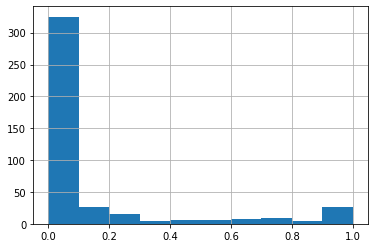

In [ ]:
dfBotAll_train[dfBotAll_train["isBot"] == "Yes"].threshold_similarity1.hist()

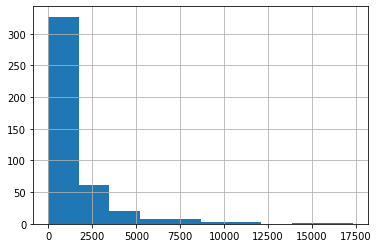

In [ ]:
dfBotAll_train[dfBotAll_train["isBot"] == "Yes"].tweet_frequency.hist()

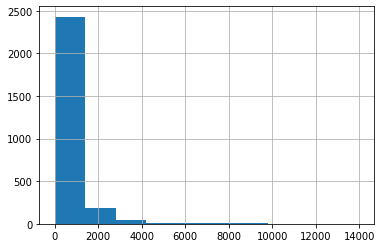

In [ ]:
dfBotAll_train[dfBotAll_train["isBot"] == "No"].tweet_frequency.hist()

In [ ]:
dfBotAll_train[(dfBotAll_train["isBot"] == "Yes") ].mean_similarity.mean()

0.31203333219185697

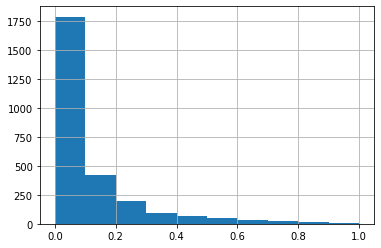

In [ ]:
dfBotAll_train[dfBotAll_train["isBot"] == "No"].hashtag_ratio.hist()

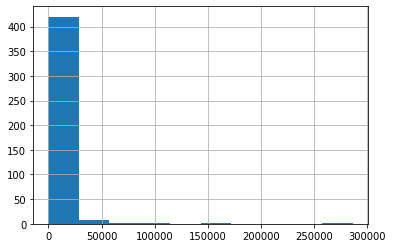

In [ ]:
dfBotAll_train[dfBotAll_train["isBot"] == "Yes"].user_followers_count.hist()

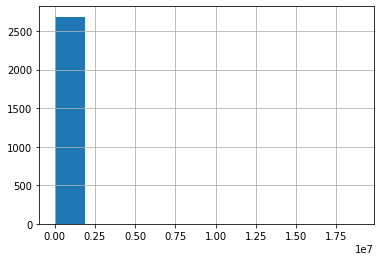

In [ ]:
dfBotAll_train[dfBotAll_train["isBot"] == "No"].user_followers_count.hist()

In [ ]:
df_copy = dfBotAll_train.copy()

In [ ]:
df_copy

,user_id,user_name,user_screen_name,user_location,user_description,user_followers_count,user_friends_count,description_len,followers_to_all_ratio,tweet_frequency,fav_ratio,retweet_total_ratio,num_median_favorites,num_of_tweets,hashtag_ratio,mean_similarity,max_similarity,threshold_similarity1,threshold_similarity2,level_0,screen_name,isBot,index,url,isOrganizational,isTroll,similarity_extra
0,1195008426784493571,Mesut Demir🎨,grslsntlarogrt,Mardin,Görsel Sanatlar Öğretmeni 🎨,2527,2609,27,0.492017,339.193548,288.000000,0.060000,1.0,188.0,0.050000,0.298341,0.857143,0.000000,0.027972,86,grslsntlarogrt,Not sure,86.0,https://docs.google.com/forms/d/e/1FAIpQLScfbD...,No,Not sure,0
1,912738858437050369,AdnanToprak,adnantoprak46,Türkiye,,7527,6755,0,0.527027,29.578947,5757.666667,0.200000,107.0,160.0,0.065000,0.234189,1.000000,0.014286,0.014286,120,adnantoprak46,No,120.0,https://docs.google.com/forms/d/e/1FAIpQLScfbD...,No,No,0
2,2490178497,"Nejla ÖNÇIRAK😷 bilgin yoksa , fikrin de olmasın👍",oykunejla,izmir,Önce insan...\nAnne❤\nHemşire❤\nHayvansever❤\n...,8819,8591,159,0.506548,281.571429,740.795918,0.230000,1.0,154.0,0.210000,0.272963,0.894427,0.000000,0.067308,219,oykunejla,No,219.0,https://docs.google.com/forms/d/e/1FAIpQLScfbD...,No,No,0
3,161774611,Tek Kişilik Muhalefet,yalaaaaannnnn,,Hüloğcular lütfen uzan durun,284,1352,28,0.173594,192.482517,128.426573,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,53,yalaaaaannnnn,Not sure,53.0,https://docs.google.com/forms/d/e/1FAIpQLScfbD...,No,Not sure,0
4,1349294559797370881,Muti_79,muti_79,"Ankara, Türkiye",,3866,3937,0,0.495450,4227.882353,10164.882353,1.000000,0.0,0.0,0.215000,0.000000,0.000000,0.000000,0.000000,39,muti_79,No,39.0,https://docs.google.com/forms/d/e/1FAIpQLScfbD...,No,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3386,1338444706204835840,laito proof,vtaeskit,eu ar55 childe main,namjoon yalvaririm telefonlarimi ac,270,673,35,0.286320,1451.666667,3911.222222,0.050000,1.0,190.0,0.030000,0.175284,0.500000,0.000000,0.000000,992,vtaeskit,No,NaN,NaN,NaN,NaN,0
3387,323513738,Ezgobar,shaammone,İzmir,humanoid 🏉 🏳️‍🌈,521,330,15,0.612221,162.416667,273.742424,0.025000,1.0,195.0,0.020000,0.209722,0.790569,0.000000,0.013605,1069,shaammone,No,NaN,NaN,NaN,NaN,0
3388,1451270540669378572,Havva Sert,havvasert19,,,155,199,0,0.437853,362.375000,263.250000,0.835052,0.0,32.0,0.479381,0.091969,0.182574,0.000000,0.000000,2671,havvasert19,No,NaN,NaN,NaN,NaN,0
3389,1354034188815654912,airi,airilynx,♡🧷she/her 18,#mitski ; i start the day high and it ends so ...,712,585,82,0.548959,361.470588,2786.470588,0.120000,1.0,176.0,0.035000,0.255271,0.800000,0.000000,0.020000,467,airilynx,No,NaN,NaN,NaN,NaN,0


In [66]:
trainingUserDf.isBot.value_counts()

No          2693
Yes          432
Not sure     267
Name: isBot, dtype: int64

#### Data Balancing 

In [144]:
dfBotAll_balance1 = dfBotAll_train[dfBotAll_train.isBot == "No"][:432]
dfBotAll_balance2 = dfBotAll_train[dfBotAll_train.isBot == "Yes"]

In [145]:
dfBotAll_balance = dfBotAll_balance1.append(dfBotAll_balance2)
dfBotAll_balance = dfBotAll_balance.sample(frac=1)
dfBotAll_balance.reset_index(inplace=True,drop=True)

In [146]:
dfBotAll_balance

,user_id,user_name,user_screen_name,user_location,user_description,user_followers_count,user_friends_count,description_len,followers_to_all_ratio,tweet_frequency,fav_ratio,retweet_total_ratio,num_median_favorites,num_of_tweets,hashtag_ratio,tweet_mean_similarity,tweet_max_similarity,tweet_threshold_similarity1,tweet_threshold_similarity2,retweet_mean_similarity,retweet_max_similarity,retweet_threshold_similarity1,retweet_threshold_similarity2,tweet_length_mean,tweet_length_std,level_0,screen_name,isBot,index,url,isOrganizational,isTroll
0,1352213538492850176,Atanmak isteyen Esra.,esratmr5826,"Sivas, Türkiye",EVEY 🎓,232,241,6,0.490486,222.764706,319.294118,0.649746,0.0,69.0,0.111675,0.692291,1.000000,0.596774,0.629032,0.963699,1.0,0.956522,0.956522,107.710145,39.931863,98,esratmr5826,No,NaN,NaN,NaN,NaN
1,1209961153,itiraf et 🎭,itirafpaylasimi,"İstanbul, Türkiye",İtiraflarınızı Sadece Gizli paylaşıyoruz! We a...,62674,76,114,0.998789,4.151786,40.785714,0.025381,69.0,192.0,0.000000,0.347126,0.944444,0.056604,0.132075,0.000000,0.0,0.000000,0.000000,54.078125,30.105702,198,itirafpaylasimi,No,198.0,https://docs.google.com/forms/d/e/1FAIpQLScfbD...,No,No
2,567480100,61trabzonhaber,61trabzonhaber,"Trabzon, Türkiye",https://t.co/LV4gNCwvEA,49628,665,23,0.986777,489.377049,1.188525,0.000000,0.0,200.0,0.000000,0.353494,0.750000,0.000000,0.016260,0.000000,0.0,0.000000,0.000000,94.770000,26.108947,1026,61trabzonhaber,No,NaN,NaN,NaN,NaN
3,902409187321417731,dila,dilatokgoz,,,21,238,0,0.081081,3.413793,62.775862,0.261780,0.0,141.0,0.026178,0.190968,0.447214,0.000000,0.000000,0.666305,1.0,0.611111,0.611111,60.780142,27.361798,2772,dilatokgoz,No,NaN,NaN,NaN,NaN
4,1389687024605609984,serra🥝,goldenofserry,Lana Del Rey,fuck off nigel,490,529,14,0.480864,2161.307692,1321.230769,0.020000,1.0,196.0,0.000000,0.365678,0.750000,0.000000,0.058824,0.000000,0.0,0.000000,0.000000,37.954082,21.560615,356,goldenofserry,No,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,545105460,twoshot,thabomalope_,"Pretoria, South Africa",bo dese ko zama.,353,197,16,0.641818,146.311475,73.581967,0.780000,0.0,44.0,0.005000,0.219299,0.365148,0.000000,0.000000,0.965832,1.0,0.959184,0.959184,41.704545,21.016854,247,thabomalope_,No,247.0,https://docs.google.com/forms/d/e/1FAIpQLScfbD...,No,No
860,3254258643,Galip Can,galipcanbay,,Kendi muhtacı himmet bir dede\nNerde kaldı gay...,12369,12700,63,0.493398,247.058824,0.223529,0.226131,1.0,154.0,0.231156,0.368286,0.909091,0.022556,0.218045,0.654707,1.0,0.525000,0.575000,82.649351,30.651059,2762,galipcanbay,Yes,NaN,NaN,NaN,NaN
861,1437136903971737602,Ercan,ercan46100,,Yalan konuşma; Ağzından çıkan sözü tut,155,96,38,0.617530,164.222222,391.666667,0.000000,1.0,200.0,1.000000,0.902540,1.000000,0.505000,0.995000,0.000000,0.0,0.000000,0.000000,125.420000,10.191349,887,ercan46100,Yes,NaN,NaN,NaN,NaN
862,1390115578698993664,Gıda Uzmanı,uzmangida1,,Gıda Mühendisi,282,310,14,0.476351,450.384615,103.153846,0.270000,0.0,146.0,0.000000,0.915060,0.947368,0.972603,0.972603,0.997642,1.0,1.000000,1.000000,139.506849,5.039905,2467,uzmangida1,Yes,NaN,NaN,NaN,NaN


### 2.2.2. Separate X and y values
We use only 4 features here to create a baseline model. However, it is not enough to get good results.

In [262]:
X = dfBotAll_train[['description_len', 'followers_to_all_ratio', 'retweet_total_ratio', 'num_median_favorites',
                    "hashtag_ratio","tweet_frequency", "fav_ratio","tweet_mean_similarity","tweet_length_std"]] #,"threshold_similarity1","max_similarity","""",,"threshold_similarity1" ,"mean_similarity"]
y = dfBotAll_train.isBot.apply(lambda x: 1 if x=='Yes' else 0)

In [147]:
# for balanced data

X = dfBotAll_balance[['description_len', 'followers_to_all_ratio', 'retweet_total_ratio', 'num_median_favorites',
                    "hashtag_ratio","tweet_frequency", "fav_ratio","tweet_mean_similarity","tweet_length_std"]] #,"threshold_similarity1","max_similarity","""",,"threshold_similarity1" ,"mean_similarity"]
y = dfBotAll_balance.isBot.apply(lambda x: 1 if x=='Yes' else 0)

### 2.2.3. Train-test split

In [263]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.20, random_state=42)

### 2.2.4. Train the model

#### Decision Tree

In [257]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error

sum = 0
mse_sum = 0

for i in range(100):
  # create an instance
  dtc_bot = DecisionTreeClassifier()

  # fit your model
  dtc_bot.fit(X_train, y_train)

  # make predictions
  preds = dtc_bot.predict(X_valid)

  # evaluate on validation set
  acc_score = accuracy_score(y_valid, preds)
  confusion = confusion_matrix(y_valid, preds)
  mse = mean_squared_error(y_valid, preds)

  #print("MSE:", mse, "\n",
  #"Accuracy Score:", acc_score, "\n",
   #   "Confusion Matrix:", "\n", confusion)
  
  sum += acc_score
  mse_sum += mse

print(sum/100)
print(mse_sum/100)

0.8161119293078051
0.1838880706921941


In [264]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error


# create an instance
dtc_bot = DecisionTreeClassifier()

# fit your model
dtc_bot.fit(X_train, y_train)

# make predictions
preds = dtc_bot.predict(X_valid)

# evaluate on validation set
acc_score = accuracy_score(y_valid, preds)
confusion = confusion_matrix(y_valid, preds)
mse = mean_squared_error(y_valid, preds)

print("MSE:", mse, "\n",
"Accuracy Score:", acc_score, "\n",
"Confusion Matrix:", "\n", confusion)



MSE: 0.18114874815905743 
 Accuracy Score: 0.8188512518409425 
 Confusion Matrix: 
 [[523  57]
 [ 66  33]]


#### Logistic Regression

In [237]:
from sklearn.linear_model import LogisticRegression

dtc_bot = LogisticRegression(max_iter=1000)
dtc_bot.fit(X_train, y_train)

preds = dtc_bot.predict(X_valid)

# evaluate on validation set
acc_score = accuracy_score(y_valid, preds)
confusion = confusion_matrix(y_valid, preds)
mse = mean_squared_error(y_valid, preds)

print("MSE:", mse, "\n",
      "Accuracy Score:", acc_score, "\n",
      "Confusion Matrix:", "\n", confusion)

MSE: 0.14432989690721648 
 Accuracy Score: 0.8556701030927835 
 Confusion Matrix: 
 [[569  11]
 [ 87  12]]


#### xGBoost

In [152]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier()

In [153]:
preds = model.predict(X_valid)

In [154]:
acc_score = accuracy_score(y_valid, preds)
confusion = confusion_matrix(y_valid, preds)
mse = mean_squared_error(y_valid, preds)

print("MSE:", mse, "\n",
      "Accuracy Score:", acc_score, "\n",
      "Confusion Matrix:", "\n", confusion)

MSE: 0.2832369942196532 
 Accuracy Score: 0.7167630057803468 
 Confusion Matrix: 
 [[65 31]
 [18 59]]


In [127]:
print(classification_report(y_valid,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       580
           1       0.56      0.19      0.29        99

    accuracy                           0.86       679
   macro avg       0.72      0.58      0.60       679
weighted avg       0.83      0.86      0.83       679



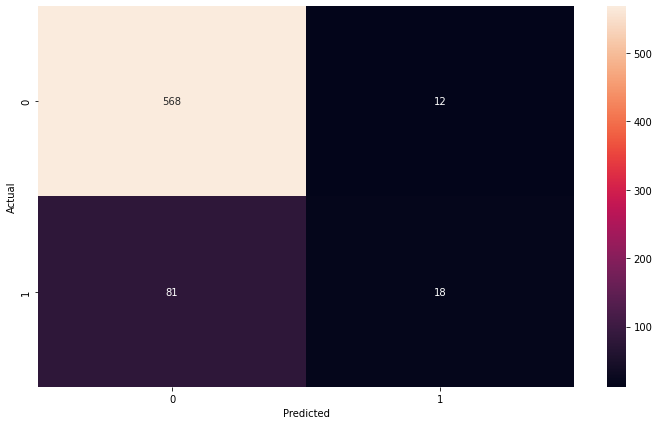

In [ ]:
confusion_matrix = pd.crosstab(y_valid, y_pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(12, 7))
sn.heatmap(confusion_matrix, annot=True, fmt='.100g')
plt.show()

#### Neural Network

In [155]:
# modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

# for modeling
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [156]:
# build a model
model = Sequential()
model.add(Dense(16, input_shape=(X.shape[1],), activation='relu')) # Add an input shape! (features,)
#model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary() 

# compile the model
model.compile(optimizer='Adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

# early stopping callback
# This callback will stop the training when there is no improvement in  
# the validation loss for 10 consecutive epochs.  
es = EarlyStopping(monitor='val_accuracy', 
                                   mode='max', # don't minimize the accuracy!
                                   patience=10,
                                   restore_best_weights=True)

# now we just update our model fit call
history = model.fit(X_train,
                    y_train,
                    callbacks=[es],
                    epochs=250, # you can set this to a big number!
                    batch_size=10,
                    validation_split=0.2,
                    shuffle=True,
                    verbose=1)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 16)                160       
                                                                 
 dense_16 (Dense)            (None, 16)                272       
                                                                 
 dense_17 (Dense)            (None, 1)                 17        
                                                                 
Total params: 449
Trainable params: 449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/250
56/56 [==============================] - 1s 5ms/step - loss: 21.5037 - accuracy: 0.5054 - val_loss: 14.9717 - val_accuracy: 0.5396
Epoch 2/250
56/56 [==============================] - 0s 3ms/step - loss: 7.1019 - accuracy: 0.5163 - val_loss: 5.1671 - val_accuracy: 0.5755
Epoch 3/250
56/56 [=================

In [158]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


# so we need to round to a whole number (0 or 1),
# or the confusion matrix won't work!
preds = np.round(model.predict(X_valid),0)

# confusion matrix
print(confusion_matrix(y_valid, preds)) # order matters! (actual, predicted)

## array([[490,  59],   ([[TN, FP],
##       [105, 235]])     [Fn, TP]])

print(classification_report(y_valid, preds))

acc_score = accuracy_score(y_valid, preds)
confusion = confusion_matrix(y_valid, preds)
mse = mean_squared_error(y_valid, preds)

print("MSE:", mse, "\n",
      "Accuracy Score:", acc_score, "\n",
      "Confusion Matrix:", "\n", confusion)

[[59 37]
 [27 50]]
              precision    recall  f1-score   support

           0       0.69      0.61      0.65        96
           1       0.57      0.65      0.61        77

    accuracy                           0.63       173
   macro avg       0.63      0.63      0.63       173
weighted avg       0.64      0.63      0.63       173

MSE: 0.3699421965317919 
 Accuracy Score: 0.630057803468208 
 Confusion Matrix: 
 [[59 37]
 [27 50]]


# 3. MAKE PREDICTIONS

Here, you will make predictions with the models that you have trained above.

## 3.1. Predictions for Tweets (Political or Not)

In [227]:
# read the evaluation file as follows
evaluationTweetDf = pd.read_csv('evaluation-round1-tweet.csv', dtype={0: str}, header=None, names=['tweet_id'])
evaluationTweetDf = evaluationTweetDf.dropna()
evaluationTweetDf



,tweet_id
0,1395690144624173056
1,1469678348607672323
2,1369333258266308618
3,1414434861675393029
4,1413618144686575618
...,...
9995,1399366607676313610
9996,1450228019637985282
9997,1441743450668355585
9998,1388867551338373121


In [228]:
# merge it with the political dataframe so that you can use the make predictions based on the variables
dfPolitical_test = dfPolitical.merge(evaluationTweetDf)
dfPolitical_test

,text,tweet_id,is_retweet,num_mentions,num_hashtags,num_retweets,retweeted_account_check,num_favorites,num_political_entities_text,num_political_entities_desc,total_interactions,tweet_length
0,@furkhanx Şu ayrıntı 👌 https://t.co/P0lDFPx0AT,1355218051214553090,0,1,0,0,0,0,0,0,0,46
1,sikmisim merkür retrosunu ya,1446578802507780102,0,0,0,0,0,10,0,0,10,28
2,Hah siktir ordan gerizekalı git anana anlat şu...,1396859026705629191,0,0,0,0,0,3,0,0,3,91
3,@oknys06 😅 hocanın tepkisine bayıldım 😁\n\nGün...,1351058108651630593,0,0,0,0,0,1,0,1,1,82
4,@BiberMor @sputnik_TR mikroorganizma duyarı ht...,1344910889741393920,0,1,0,0,0,0,0,1,0,67
...,...,...,...,...,...,...,...,...,...,...,...,...
9994,Hulki Cevizoğlu :\nKemal Kılıçdaroğlu aday olm...,1458182706282520585,0,0,0,0,0,6,3,0,6,140
9995,Takipdeyiz tum hàl sozlerini...bilsinler... ht...,1449086069325115396,0,0,0,1,0,2,0,0,3,67
9996,yaz başladı resmen...,1406732093674172417,0,0,0,0,0,0,0,0,0,21
9997,@rockerfellerxau Vadeli de doge tutmakla çok b...,1442838458934906882,0,1,0,0,0,1,0,0,1,59


In [229]:
dfPolitical_test.columns

Index(['text', 'tweet_id', 'is_retweet', 'num_mentions', 'num_hashtags',
       'num_retweets', 'retweeted_account_check', 'num_favorites',
       'num_political_entities_text', 'num_political_entities_desc',
       'total_interactions', 'tweet_length'],
      dtype='object')

In [230]:
# define X as we did above in section (2.x.2. Separate X and y values)
X = dfPolitical_test[["is_retweet","num_mentions","num_hashtags","num_retweets","retweeted_account_check","num_favorites",
                          "num_political_entities_text","num_political_entities_desc","total_interactions","tweet_length"]]

# make predictions based on these variables
predictions_political = dtc_political.predict(X)

### This part is important! We expect you to return your predictions in the following format:

In [231]:
modelPredTweet = dict([(x,float(y)) for x,y in zip([*dfPolitical_test.tweet_id], predictions_political)])
modelPredTweet

{'1355218051214553090': 0.0,
 '1446578802507780102': 0.0,
 '1396859026705629191': 0.0,
 '1351058108651630593': 0.0,
 '1344910889741393920': 0.0,
 '1402216638926163968': 1.0,
 '1433340600544342016': 0.0,
 '1359234185819541505': 0.0,
 '1370134257490870273': 0.0,
 '1404914095254654985': 0.0,
 '1423390250932518912': 1.0,
 '1379103391561973776': 0.0,
 '1441887862262321152': 0.0,
 '1428477576436125697': 0.0,
 '1430964534865547267': 0.0,
 '1396099692392591369': 0.0,
 '1453457844834025482': 0.0,
 '1368522336543137795': 0.0,
 '1471136747916562432': 1.0,
 '1426676740659814403': 0.0,
 '1380989833452093440': 0.0,
 '1382055945849729026': 0.0,
 '1386220168293101570': 0.0,
 '1446955255971856387': 0.0,
 '1387932542804930560': 0.0,
 '1449557637318811660': 1.0,
 '1435612604278398979': 0.0,
 '1416447338202152965': 0.0,
 '1418854349451763714': 0.0,
 '1460256346624954371': 1.0,
 '1360961144769425411': 0.0,
 '1357077764533272577': 0.0,
 '1459738176520704002': 1.0,
 '1403968671425482754': 0.0,
 '144222984189

In [271]:
counter = 0
for i in modelPredTweet.values():
  if int(i) == 1:
    counter +=1

print(counter)

4812


## 3.2. Predictions for Users (Bot or Not)

In [265]:
evaluationUserDf = pd.read_csv('evaluation-round1-user.csv', dtype={0: str}, header=None, names=['user_screen_name'])
evaluationUserDf = evaluationUserDf.dropna()

# merge it with the political dataframe so that you can use the make predictions based on the variables
dfBot_test = dfBotAll.merge(evaluationUserDf)

# define X as we did above in section (2.x.2. Separate X and y values)
X = dfBot_test[['description_len', 'followers_to_all_ratio', 'retweet_total_ratio', 'num_median_favorites',
                    "hashtag_ratio","tweet_frequency", "fav_ratio","tweet_mean_similarity","tweet_length_std"]]

# make predictions based on these variables
predictions_bot = dtc_bot.predict(X)

In [266]:
modelPredUser = dict([(x,float(y)) for x,y in zip([*dfBot_test.user_screen_name], predictions_bot)])
modelPredUser

{'adnantoprak46': 0.0,
 'hazanguzel': 0.0,
 'sabirsiztr': 0.0,
 'alonedrummer': 0.0,
 'doktoramaaktor': 0.0,
 'muneccimsimge': 0.0,
 'koramzeynep': 0.0,
 'rabosscy': 0.0,
 'aykut190720': 0.0,
 'shadowoflower': 0.0,
 'adler16392917': 0.0,
 'alioztoprak06': 0.0,
 'ozk_emrullah': 0.0,
 'emineemiir': 0.0,
 'rsrsrs97': 0.0,
 'herseyeloji': 0.0,
 'eceemsoysal': 0.0,
 'viennabjk93': 0.0,
 'neogaymyback': 0.0,
 'av_abdurrahim': 1.0,
 'theinformavore': 0.0,
 'ahmetin93': 0.0,
 'neselibalkabagi': 0.0,
 'veckatimest': 0.0,
 'torbacisso': 0.0,
 'psychobutlogist': 0.0,
 'whiplashgirl_': 0.0,
 'senihadeyin': 0.0,
 'awwdizzy': 0.0,
 'suleymany4': 0.0,
 'canandrli': 0.0,
 'meloreco_recmel': 0.0,
 'limon99': 0.0,
 'odymsah': 0.0,
 'bagcebariscan': 0.0,
 'kasimileri_': 0.0,
 'dafemfairy': 0.0,
 'hadibak': 1.0,
 'laikmuhendis': 0.0,
 'aytacvehbi': 0.0,
 'f_pandaq': 0.0,
 'obanioglu': 0.0,
 'fbrepublicorg': 0.0,
 'mistikgucler1': 0.0,
 'cenkeroglu_1905': 0.0,
 'dcnp01': 0.0,
 'garciagala_': 0.0,
 'gokmeno

In [267]:
counter = 0
for i in modelPredUser.values():
  if int(i) == 1:
    counter +=1

print(counter)

1249


# PREPARE SUBMISSION

You will need to submit exact same file produced by using the following code. Any deviation from the desired format willbe marked as 0.

In [273]:
with open('{}/{}-round{}-tweet.txt'.format(DATA_PATH, STUDENT_ID, ROUND), 'w') as fl:
    fl.write('{} - {}\n'.format(STUDENT_ID, PROJECT_CODE))
    fl.write(json.dumps(modelPredTweet))
    
    
with open('{}/{}-round{}-user.txt'.format(DATA_PATH, STUDENT_ID, ROUND), 'w') as fl:
    fl.write('{} - {}\n'.format(STUDENT_ID, PROJECT_CODE))
    fl.write(json.dumps(modelPredUser))

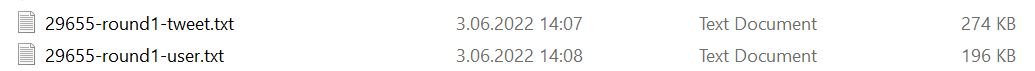

In [ ]:
display.Image("https://i.imgur.com/lcwRsOW.png")

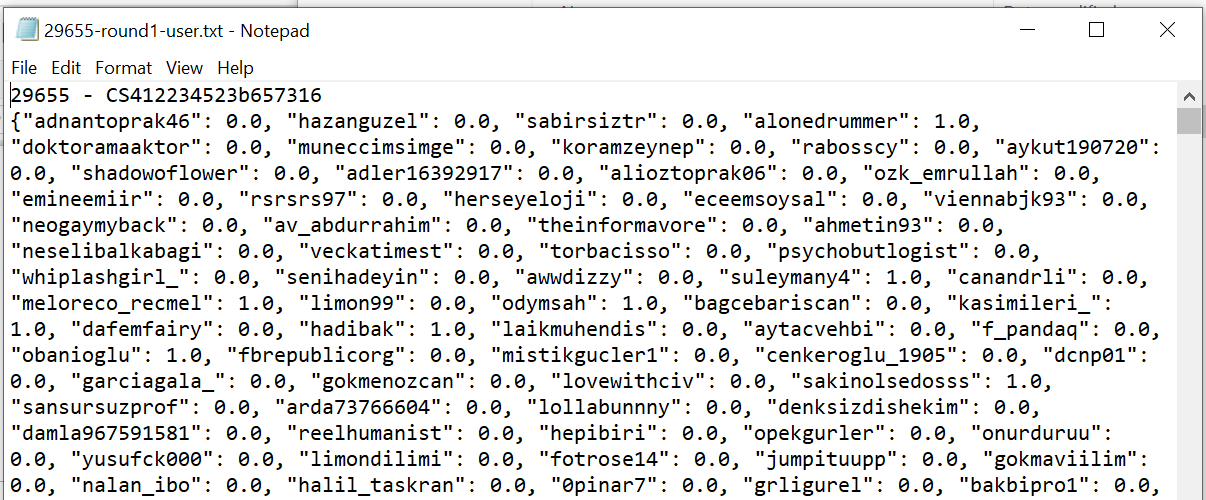

In [ ]:
display.Image("https://i.imgur.com/qfxqgMF.png")

You can check whether you can read your predictions correctly or not:

In [270]:
with open('{}/{}-round{}-tweet.txt'.format(DATA_PATH, STUDENT_ID, ROUND), 'r') as fl:
    file = fl.read()

student_info = file.split("\n")[0]
predictions = eval(file.split("\n")[1])

print(student_info)
print(predictions)

25202 - CS4120db4fc7b2d34
{'1355218051214553090': 0.0, '1446578802507780102': 0.0, '1396859026705629191': 0.0, '1351058108651630593': 0.0, '1344910889741393920': 0.0, '1402216638926163968': 1.0, '1433340600544342016': 0.0, '1359234185819541505': 0.0, '1370134257490870273': 0.0, '1404914095254654985': 0.0, '1423390250932518912': 1.0, '1379103391561973776': 0.0, '1441887862262321152': 0.0, '1428477576436125697': 0.0, '1430964534865547267': 0.0, '1396099692392591369': 0.0, '1453457844834025482': 0.0, '1368522336543137795': 0.0, '1471136747916562432': 1.0, '1426676740659814403': 0.0, '1380989833452093440': 0.0, '1382055945849729026': 0.0, '1386220168293101570': 0.0, '1446955255971856387': 0.0, '1387932542804930560': 0.0, '1449557637318811660': 1.0, '1435612604278398979': 0.0, '1416447338202152965': 0.0, '1418854349451763714': 0.0, '1460256346624954371': 1.0, '1360961144769425411': 0.0, '1357077764533272577': 0.0, '1459738176520704002': 1.0, '1403968671425482754': 0.0, '1442229841898532867'